
# <font color="#880000"> Image Cutouts of Co-Added TESS Full Frame Images 

## <font color="#880000">The TESS Sky Survey

The Transiting Exoplanet Sky Survey (TESS) is surveying the sky with four CCD cameras, each with a field of view of 24 degrees and pixel size 21 arcmin. These cameras are aligned to cover the sky in a combined instantaneous field of view of 24 x 96 degrees. The survey observing pattern consists of 26 of these sectors of sky, 13 in each hemisphere, centered near the ecliptic poles. The schematic illustrates the field of view and scan pattern (from Ricker et al. 2015, JATIS, 1, 014003). This has since been modified for Year 2 operations in the Northern hemisphere, to start some sectors at a higher latiutude.


<img style="float: right;" src="TESS_notebook_image.png" width =350 height= 350 />  



TESS acquires approximately 1200 observations ("full frame images, FFIs) of each sector over thirty 30 days  with an observing cadence of 30 minutes, and then moves to the adjacent sector. Thus over two years, TESS accumulates a survey of the sky in both hemispheres. 






## <font color="#880000"> Low Surface Brightness Astronomy with TESS

The optical design of TESS makes it a potentially powerful tool for studying the low surface brightness Universe. Thus we have used the Montage image mosaic engine (http://montage.ipac.caltech.edu) to create co-added images of the observations in each sector, by exactly registering all the images in each sector and coadding them.  These coadded images can be accessed through this cut out service. The data set consists consists of 336 images derived from the 21 sectors of data that been released in Spring 2020. 

## <font color="#880000">A Python Notebook for Creating Cutouts of TESS Coadded Images

This notebook demonstrates the use of a Python client library to discover the sky coverage of an object or position within the co-added images, and to create image cutouts at these positions. The library delivers cutouts from the co-added images, rather than from a mosaic of the co-added images, because a mosaic shows serious contamination from residual scattered light on spatial scales of as small as 5 degrees.

### <font color="#88000"> Need help? Contact the Montage help desk at http://vaoweb3.ipac.caltech.edu/cgi-bin/Helpdesk/nph-genTicketForm?projname=Montage&projmail=montage@ipac.caltech.edu



## <font color="#880000"> Mosaic in Aitoff projection of TESS FFIs from sectors 1 through 21, with sample cutouts
    
The mosaic includes cutouts of four galaxies: N891 (image at bottom left; 1 degree), M31 (far right; 2.3 degrees), N5907 (left center; 1 degree), M101 (right center; 1 degree). Even with the large residual backgroun variations, the background on the scale of the galaxy environments is smooth, and indicates that TESS data are suitable for Low Surfce Brightness Astronomy.  The mosaic was created on the Amazon Elastic Cloud 2 of Amazon Web Services.
    

<img style="float: center;" src="TESS_mosaic.png"/>

### <font color="#880000"> Set up

If you have not done so, please install or update MontagePy: 

     pip install update MontagePy

In [2]:
import os
from tess_coadds import TESSCoadds

##  <font color="#880000"> Example 1: M51

### <font color="#880000"> Discover Co-added Images

Input a location on the sky - either a position on the  sky or an object name (resolved into coordinates using the Exoplanet Archive / SIMBAD / NED name resolvers) to return a table of all the TESS coadds covering that location. The service returns a table that records the metadata of the co-added images that meet the search criteria, including position (RA and Dec in decimal and sexagesimal formats; WCS information; for corners of the image in RA and Dec, filesize in bytes, and filename. The filname is tess_M51_0.00100.tbl.

In [3]:
coadds = TESSCoadds( 'M51', server='http://montage.ipac.caltech.edu/cgi-bin/TESSCoadds')

tbldata = coadds.tbldata

if len(tbldata) == 0:
    print("\n>>> Sorry, that location is not (yet) covered by TESS.\n")
else:
    print(tbldata)

cntr      ra        dec     ...    size   hdu              fname             
---- ----------- ---------- ... --------- --- -------------------------------
 170 200.3142184 49.9013017 ... 408697920   0 tess_sector16_camera4_ccd3.fits


### <font color="#880000"> Return the cutout

There is only one co-add covering the location of M51. A cutout at this location can be retrieved using a user-defined box size in degrees; in this example we use a size of 4 degrees.If a location lies near the edge of a coadded plate, the cutout may be smaller than requested (recall we are not returning cutouts of a moasaic). The cutouts will be saved to local disk.  


In [4]:
filenames = coadds.cutouts(4.0)

print(filenames)

['M51_4.00000_tess_sector16_camera4_ccd3.fits']



<hr/>

### <font color="#880000"> Displaying the images

We will loop across the images (one in this example!), and use Montage utilties to visualize the images. mShrink creates a lower resolution image suitable for visualization. The parameter of value 0.5 shrinks the image by factor (1/parameter)-squared, which is x4 in this example. The shrunken image is passed to mViewer to create a PNG for visualization. (Explain the stripes)

M51_4.00000_tess_sector16_camera4_ccd3.fits


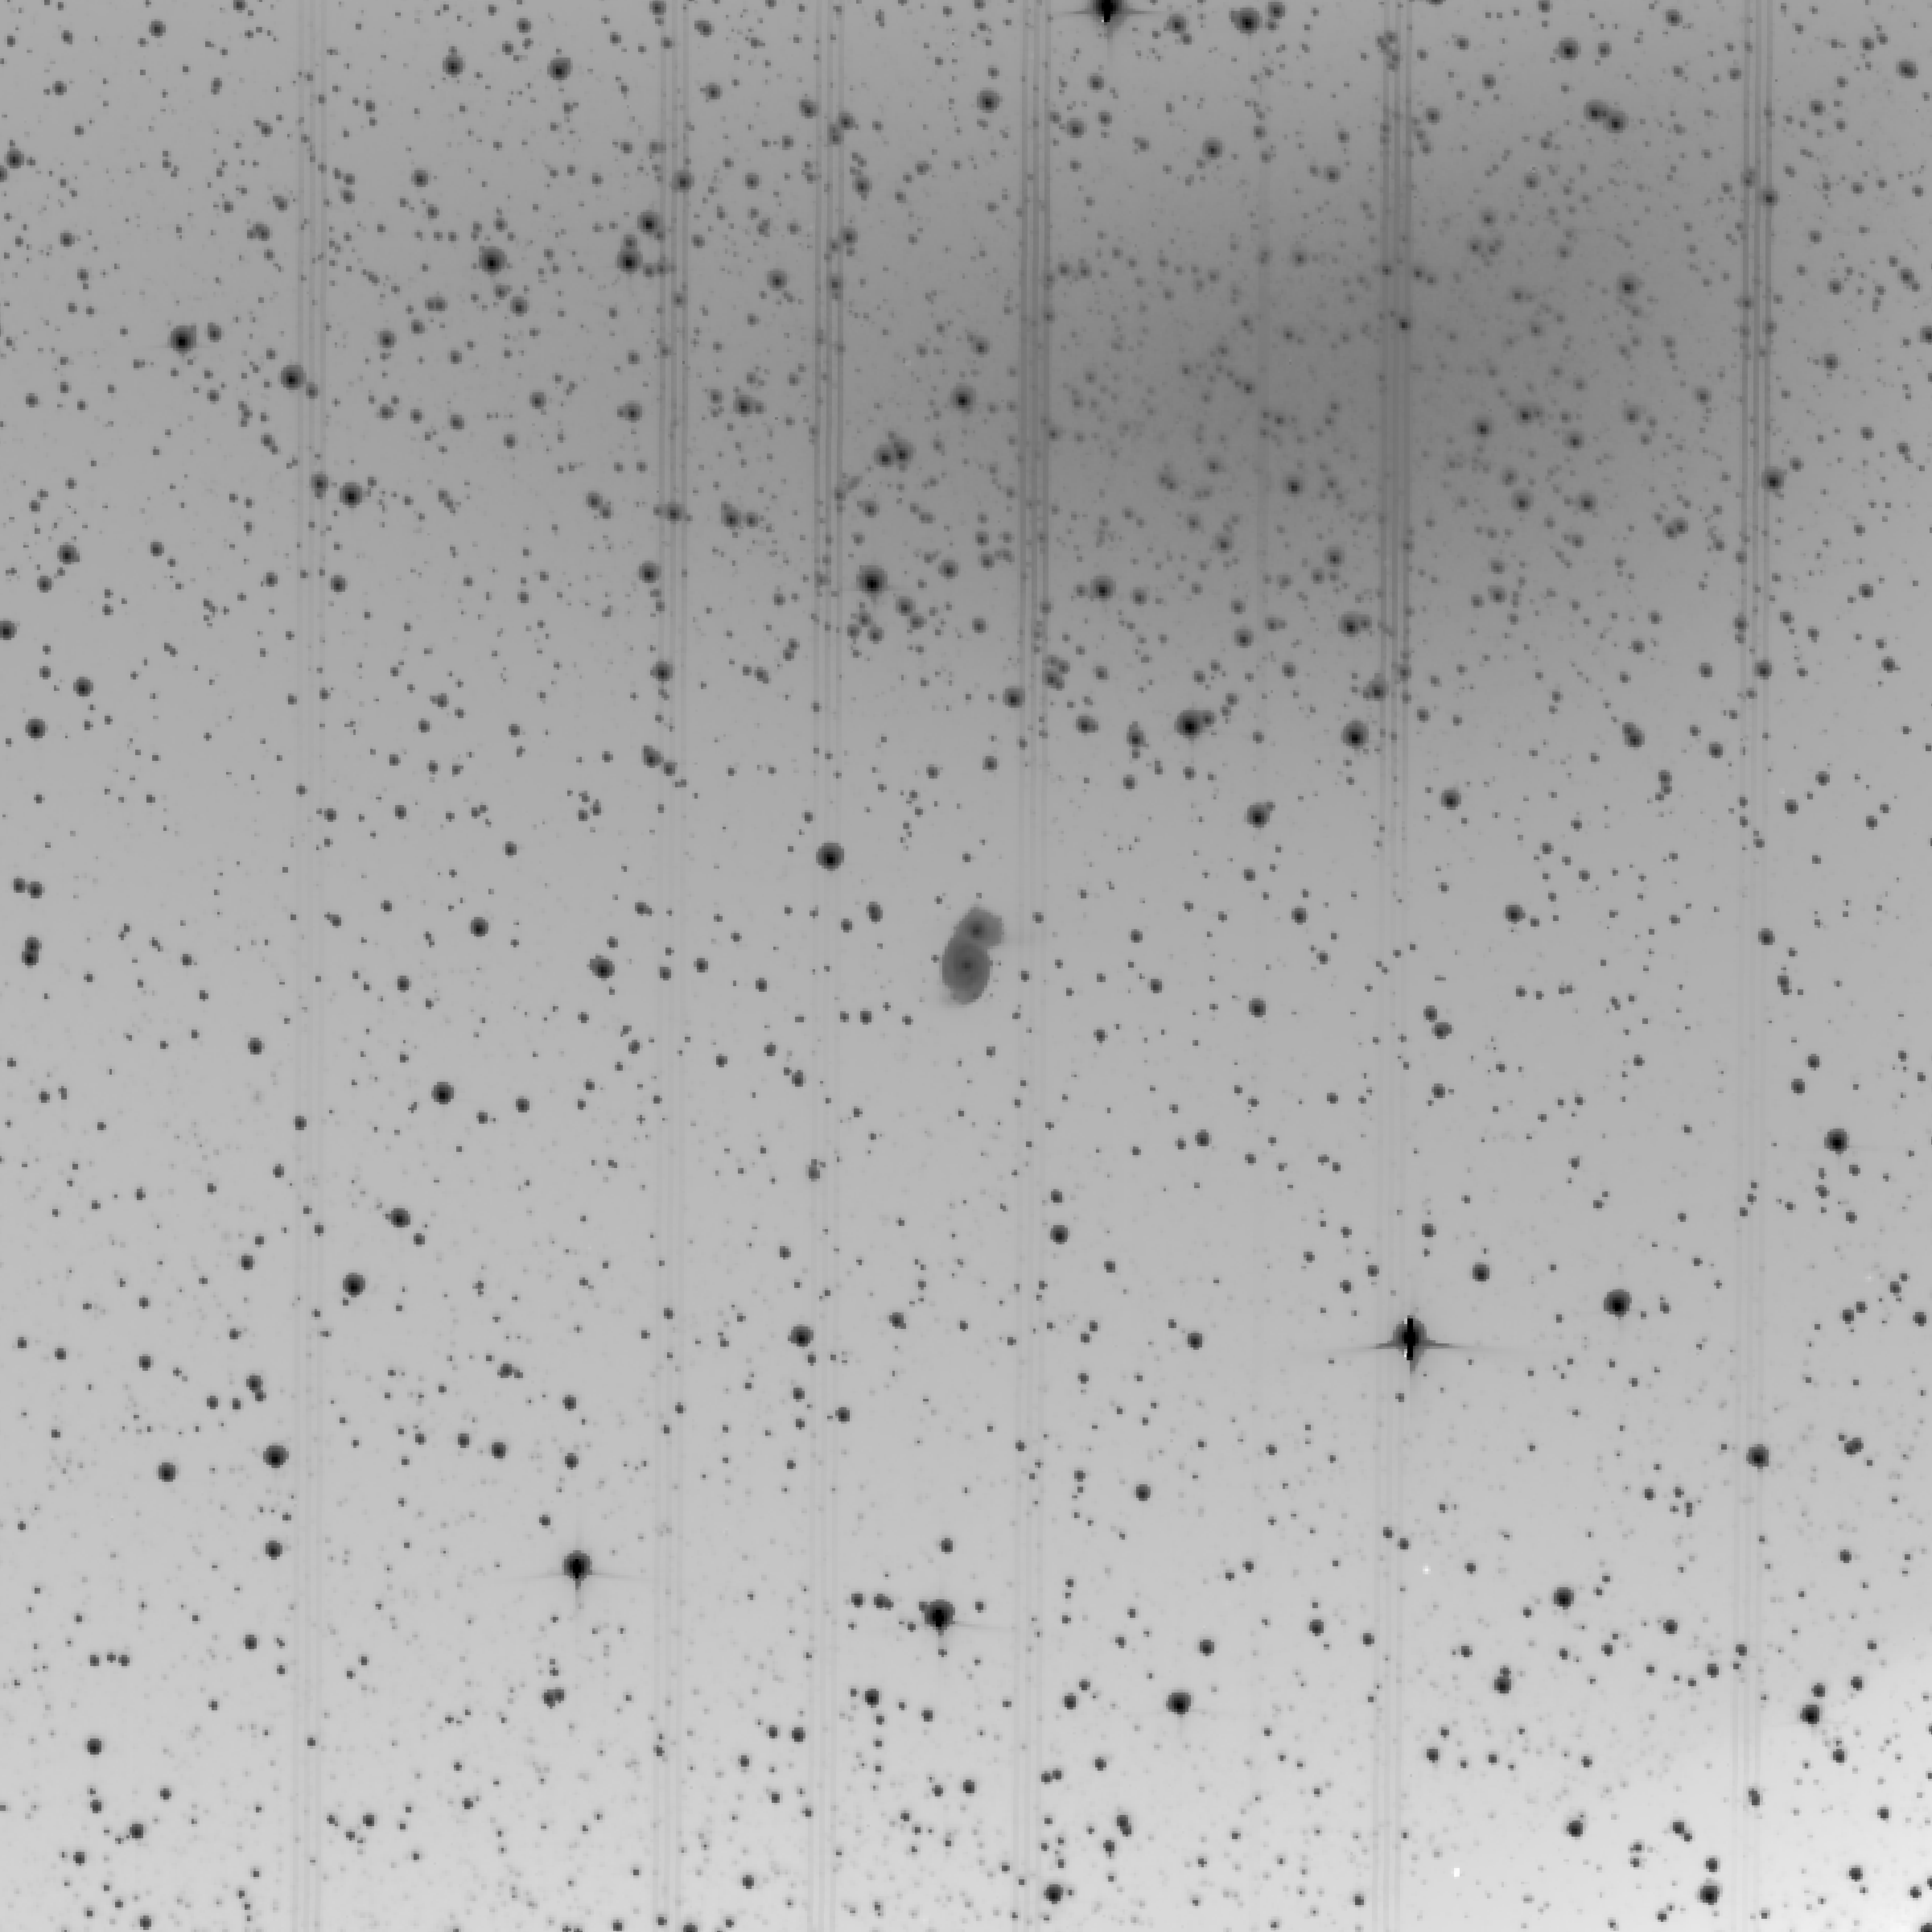

In [5]:
from MontagePy.main import mShrink, mViewer
from IPython.display import Image, display

for fname in filenames:
    print(fname)
    
    mShrink(fname, 'big.fits', 0.5)
    
    mViewer('-ct 1 -gray big.fits min max gaussian-log', 'tess.png', mode=2)

    image = Image(filename='tess.png')
    
    display(image)
    

The image shows the Whirlpool Galaxy (M51A or NGC 5194); the smaller object above it is M51B or NGC 5195. The vertical stripes in the image are associated with the CCD strapping. 

## <font color="#880000"> Example 2: A location covered by mutiple coadds

### <font color="#880000"> Discover co-added Images

The number of coadds covering a location varies across the sky, as is clear from the figure earlier in the Notebook. Locations near the the ecliptic poles may be covered up to, while locations close to the ecliptic poles are not covered at all.   More than half the sky will be covered only once. 

In this example, the LMC is covered 12 times:

In [13]:
coadds = TESSCoadds( 'LMC', server='http://montage.ipac.caltech.edu/cgi-bin/TESSCoadds')

tbldata = coadds.tbldata

if len(tbldata) == 0:
    print("\n>>> Sorry, that location is not (yet) covered by TESS.\n")
else:
    print(tbldata)

cntr     ra         dec     ...    size   hdu              fname             
---- ---------- ----------- ... --------- --- -------------------------------
  72 89.2339041 -75.3357125 ... 408755520   0 tess_sector11_camera4_ccd1.fits
  24 67.3341845 -68.9937578 ... 408983040   0 tess_sector10_camera4_ccd4.fits
 135 69.0819149 -71.3892331 ... 408697920   0 tess_sector06_camera4_ccd3.fits
 150 71.5890304 -72.7797862 ... 409040640   0 tess_sector09_camera4_ccd4.fits
 235 68.0603028 -70.0991158 ... 408813120   0 tess_sector13_camera4_ccd1.fits
 293 74.7545964 -73.7165248 ... 408870720   0 tess_sector12_camera4_ccd1.fits
 307 68.1462981 -70.2224442 ... 410929920   0 tess_sector03_camera4_ccd2.fits
  44 67.3471633 -67.3485325 ... 408813120   0 tess_sector07_camera4_ccd3.fits
 199 68.0629852 -66.0630747 ... 408983040   0 tess_sector04_camera4_ccd2.fits
  78 83.2476986 -75.1447802 ... 409040640   0 tess_sector08_camera4_ccd4.fits
 229 75.0865087 -73.8091541 ... 409040640   0 tess_sector02_came

### <font color="#880000"> Return the cutouts
Return 12  cutouts with size 2.0 degrees.   The cutouts will be saved to local disk, whre you can manage them as you choose.


In [14]:
filenames = coadds.cutouts(2.0)

print(filenames)

['LMC_2.00000_tess_sector11_camera4_ccd1.fits', 'LMC_2.00000_tess_sector10_camera4_ccd4.fits', 'LMC_2.00000_tess_sector06_camera4_ccd3.fits', 'LMC_2.00000_tess_sector09_camera4_ccd4.fits', 'LMC_2.00000_tess_sector13_camera4_ccd1.fits', 'LMC_2.00000_tess_sector12_camera4_ccd1.fits', 'LMC_2.00000_tess_sector03_camera4_ccd2.fits', 'LMC_2.00000_tess_sector07_camera4_ccd3.fits', 'LMC_2.00000_tess_sector04_camera4_ccd2.fits', 'LMC_2.00000_tess_sector08_camera4_ccd4.fits', 'LMC_2.00000_tess_sector02_camera4_ccd2.fits', 'LMC_2.00000_tess_sector05_camera4_ccd3.fits']



<hr/>

### <font color="#880000"> Displaying the images

Loop over the cutouts and visualize them.  You may substitute your favorite visualizer if you wish.

LMC_2.00000_tess_sector11_camera4_ccd1.fits


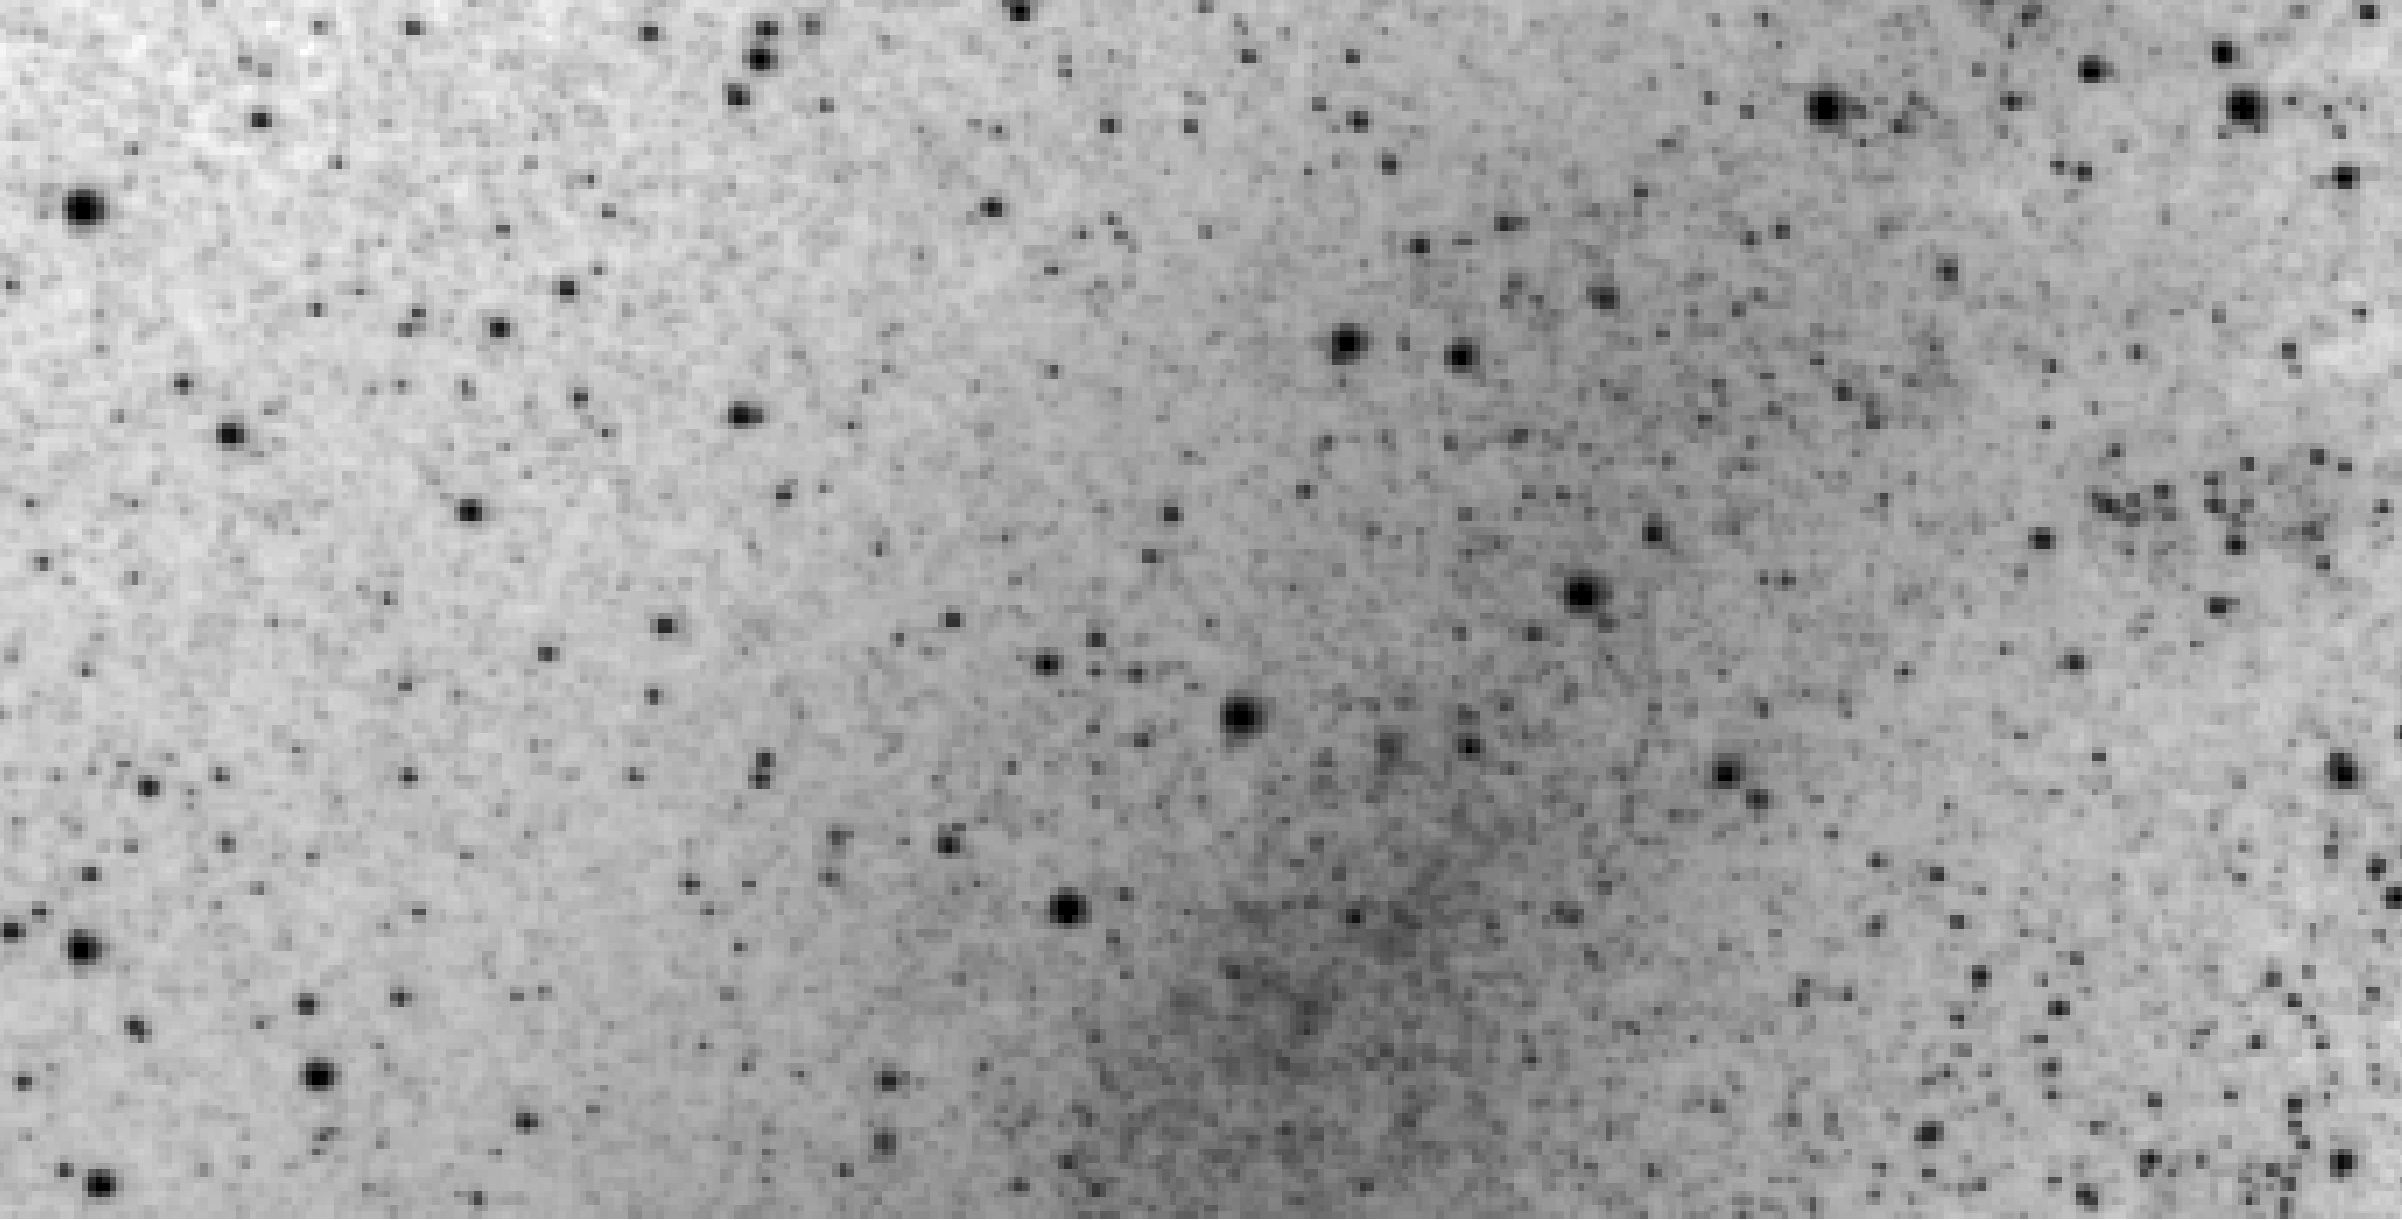

LMC_2.00000_tess_sector10_camera4_ccd4.fits


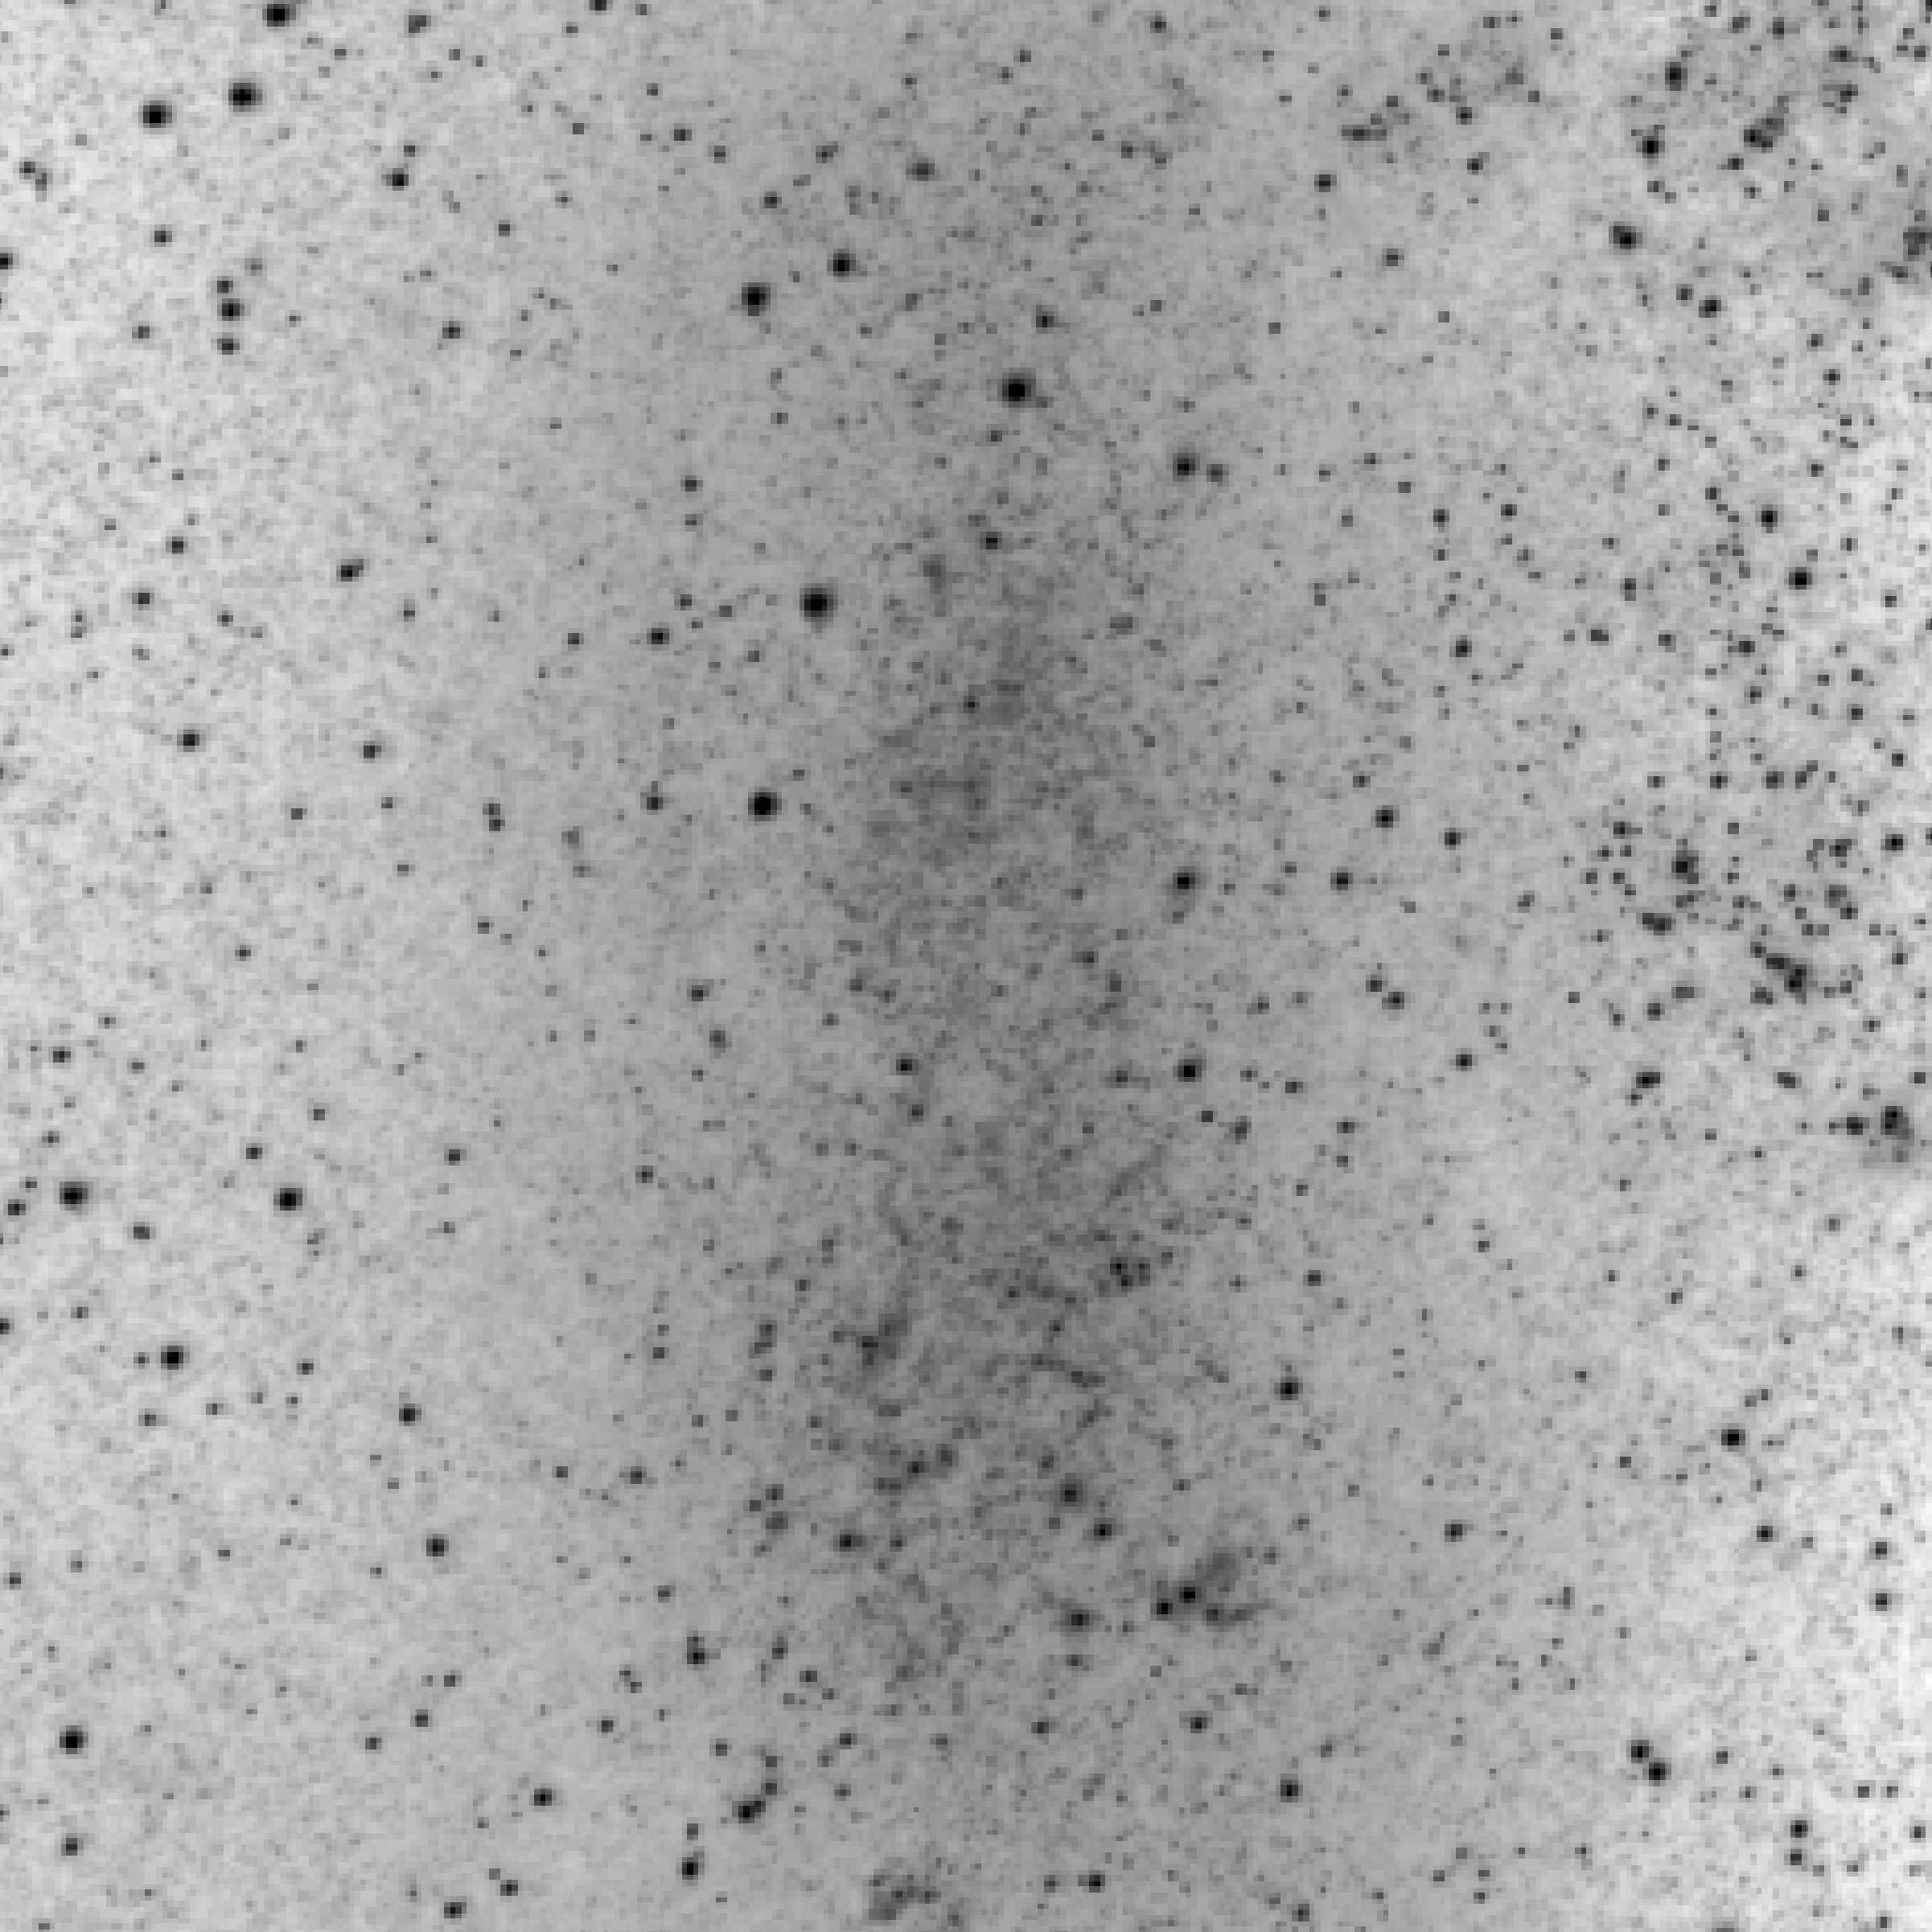

LMC_2.00000_tess_sector06_camera4_ccd3.fits


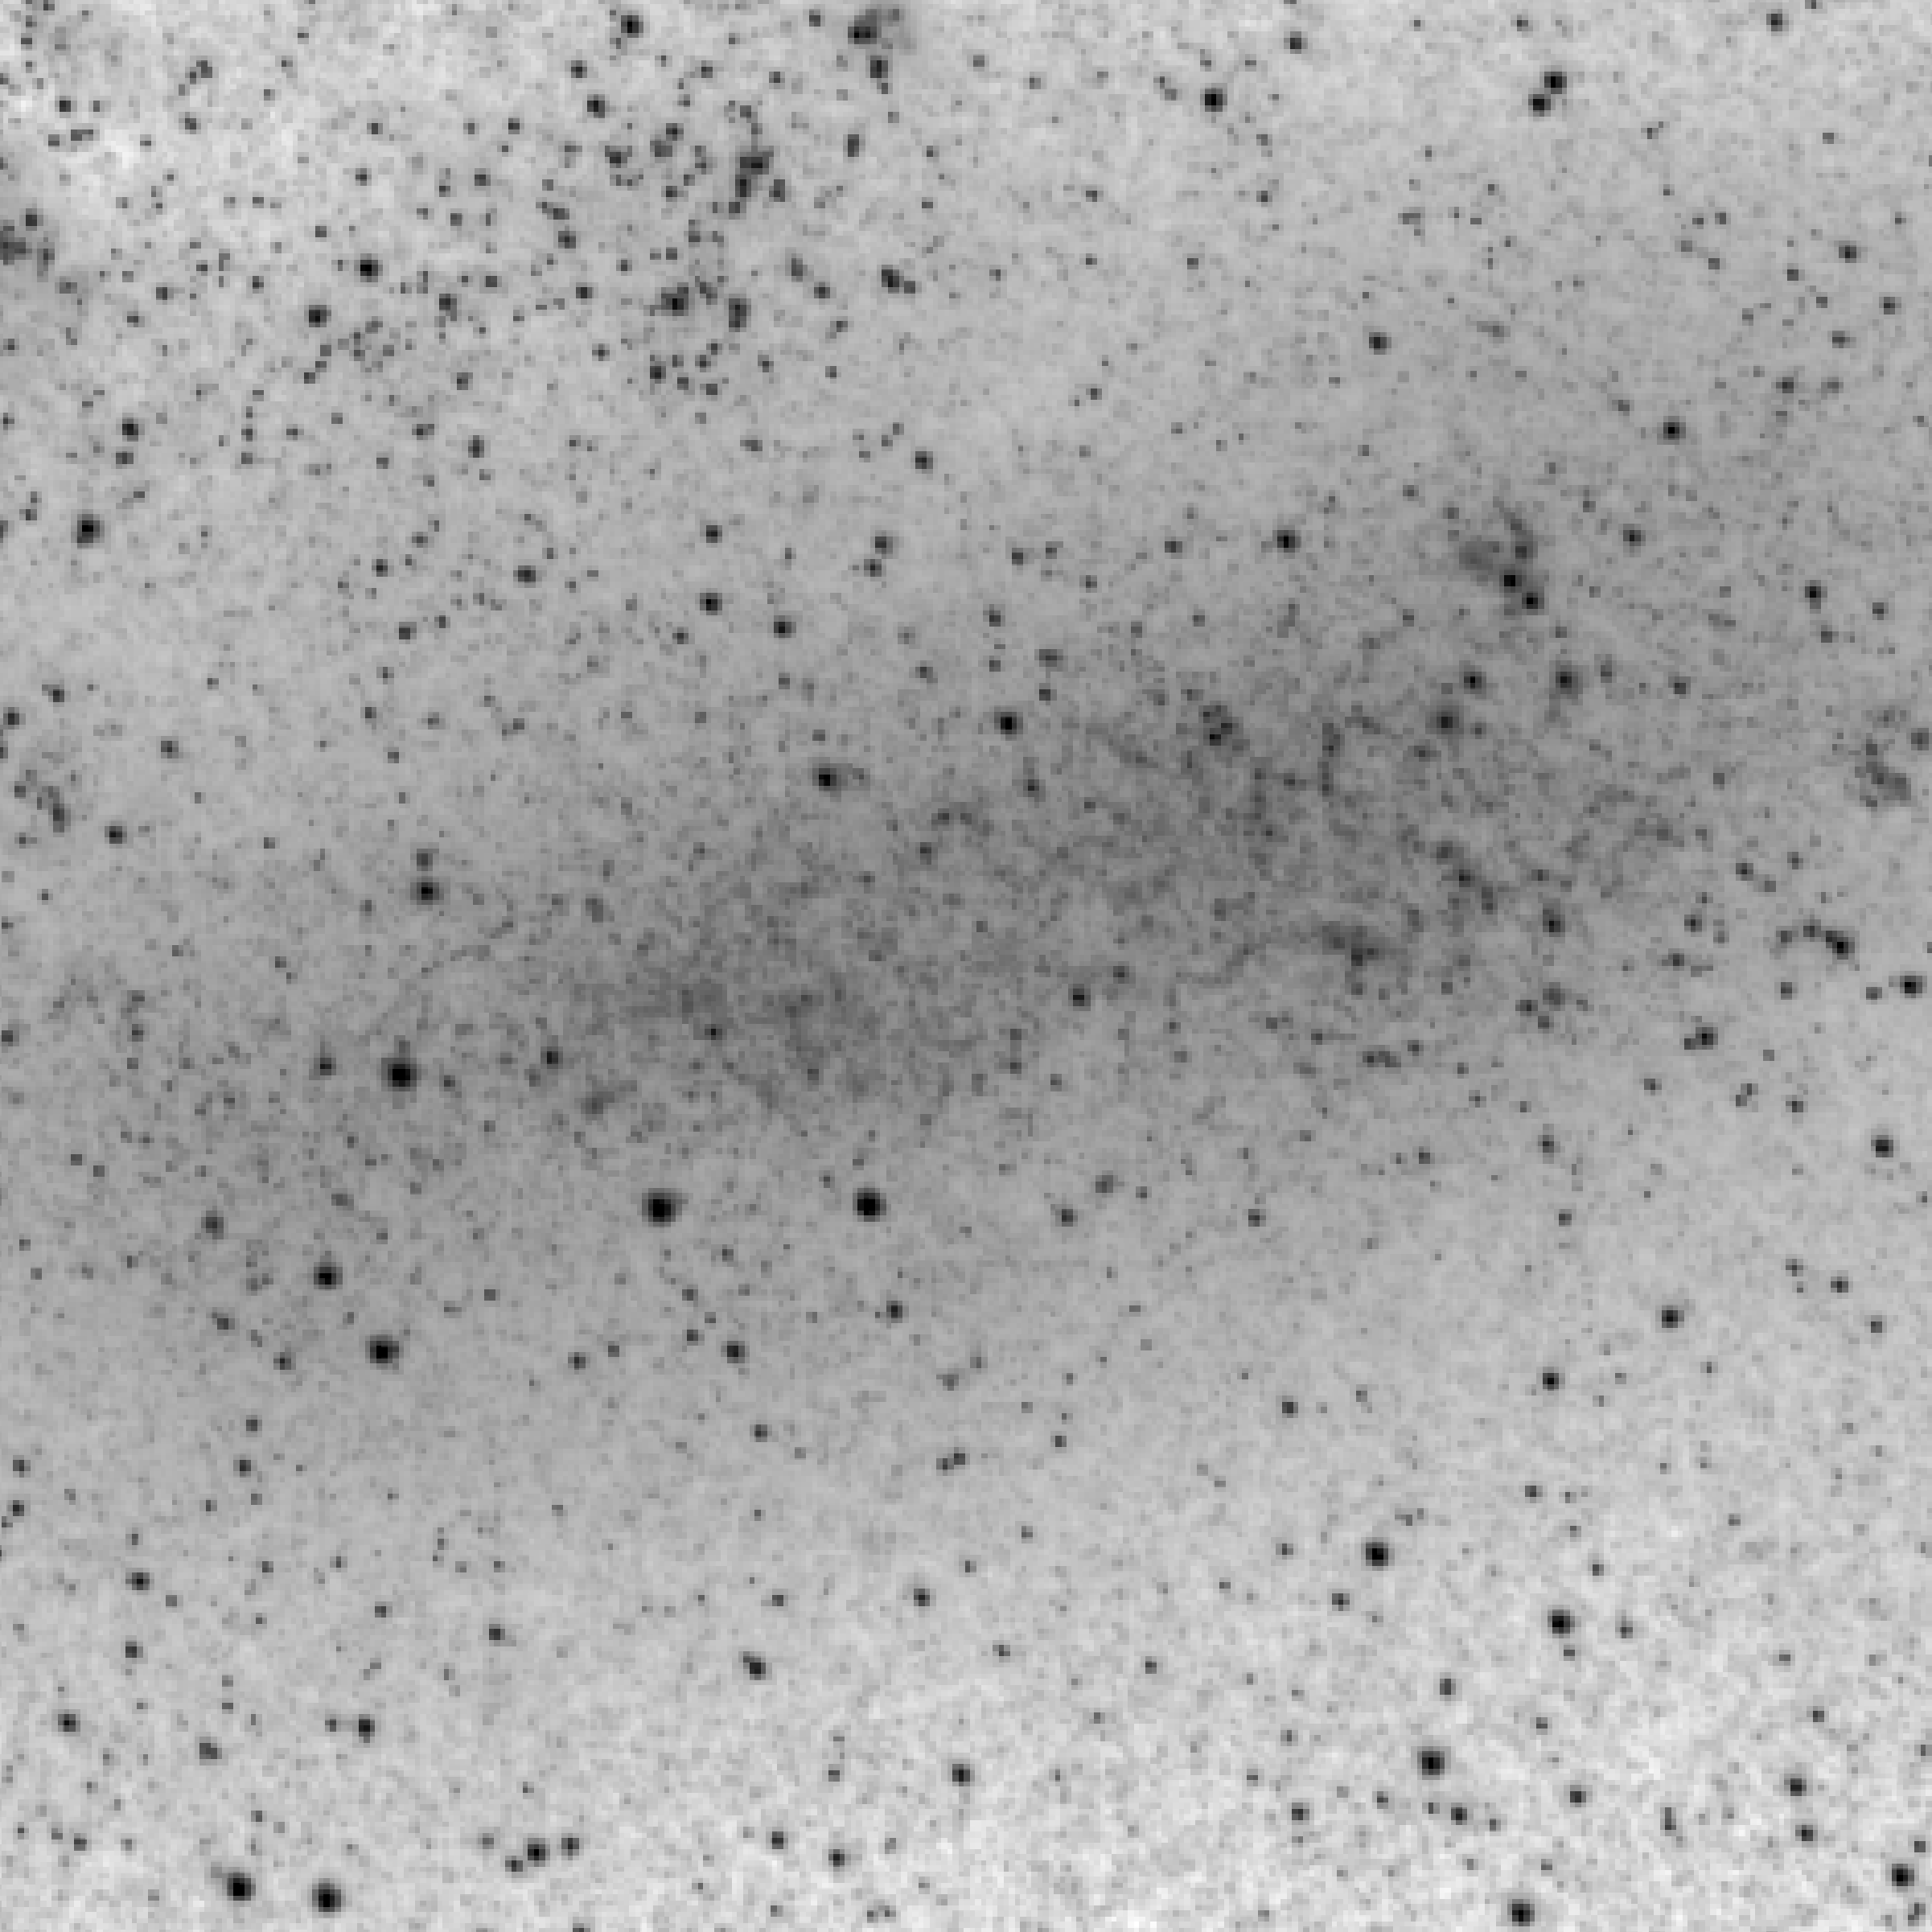

LMC_2.00000_tess_sector09_camera4_ccd4.fits


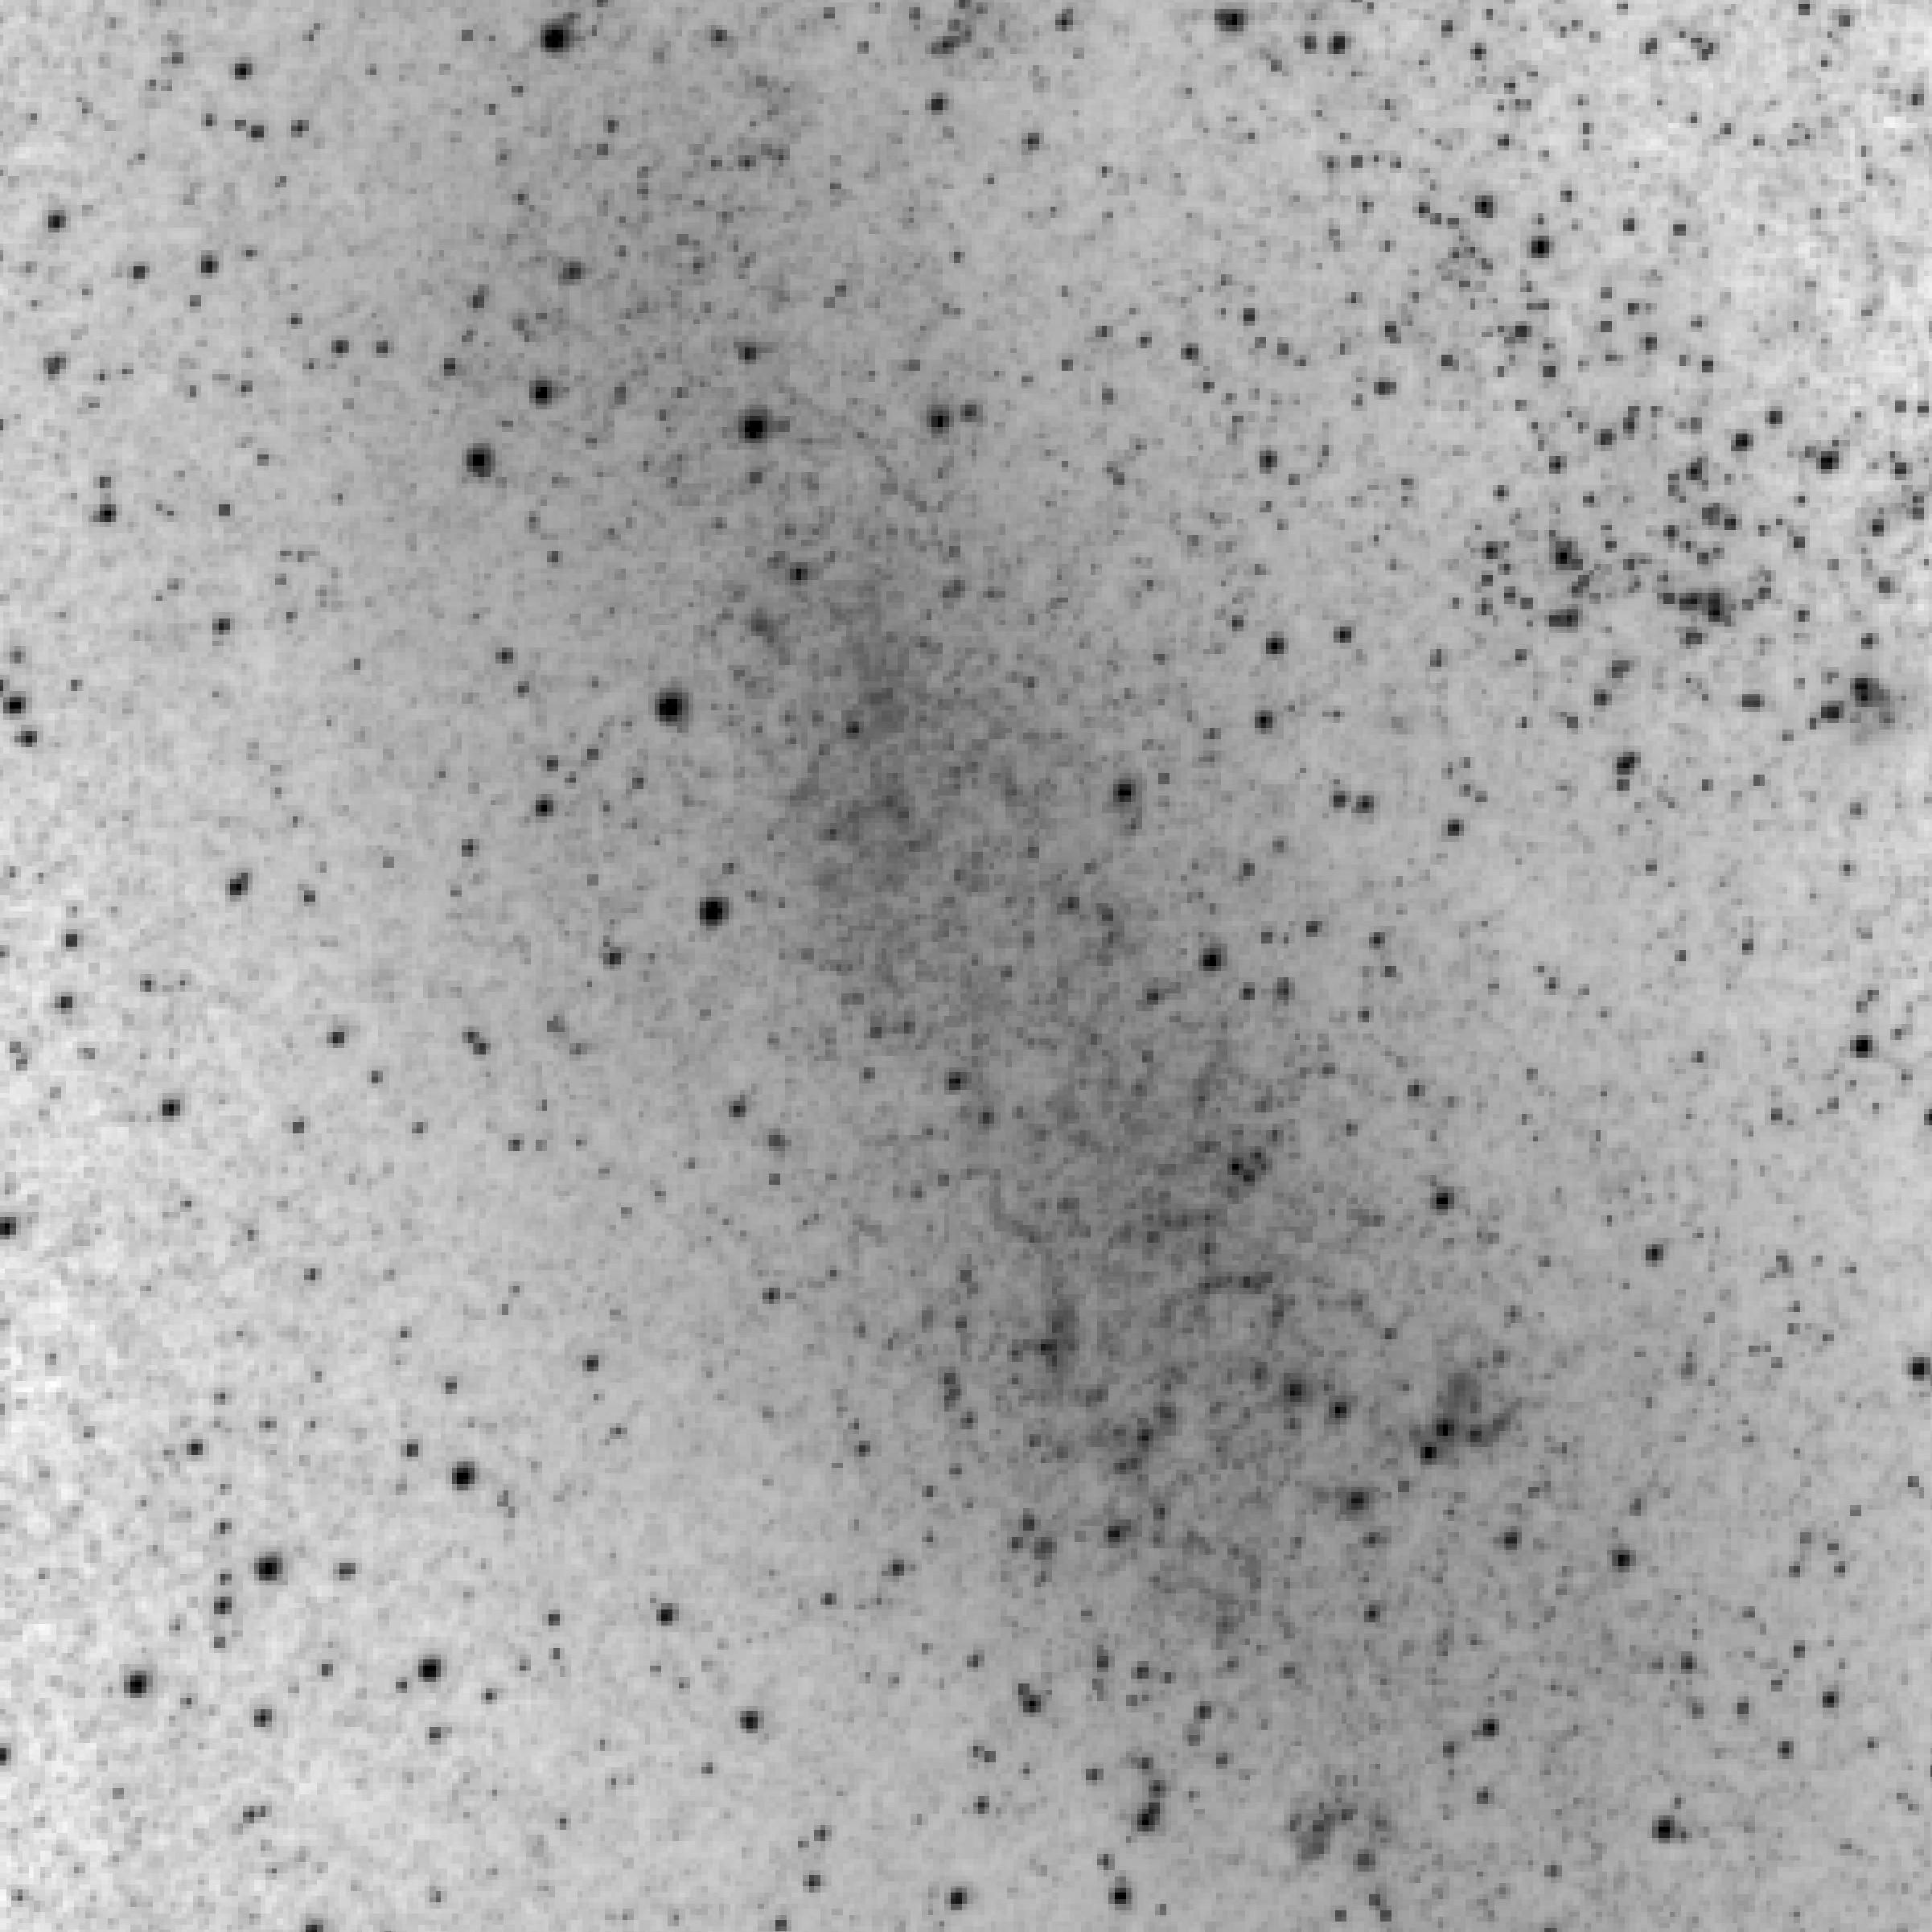

LMC_2.00000_tess_sector13_camera4_ccd1.fits


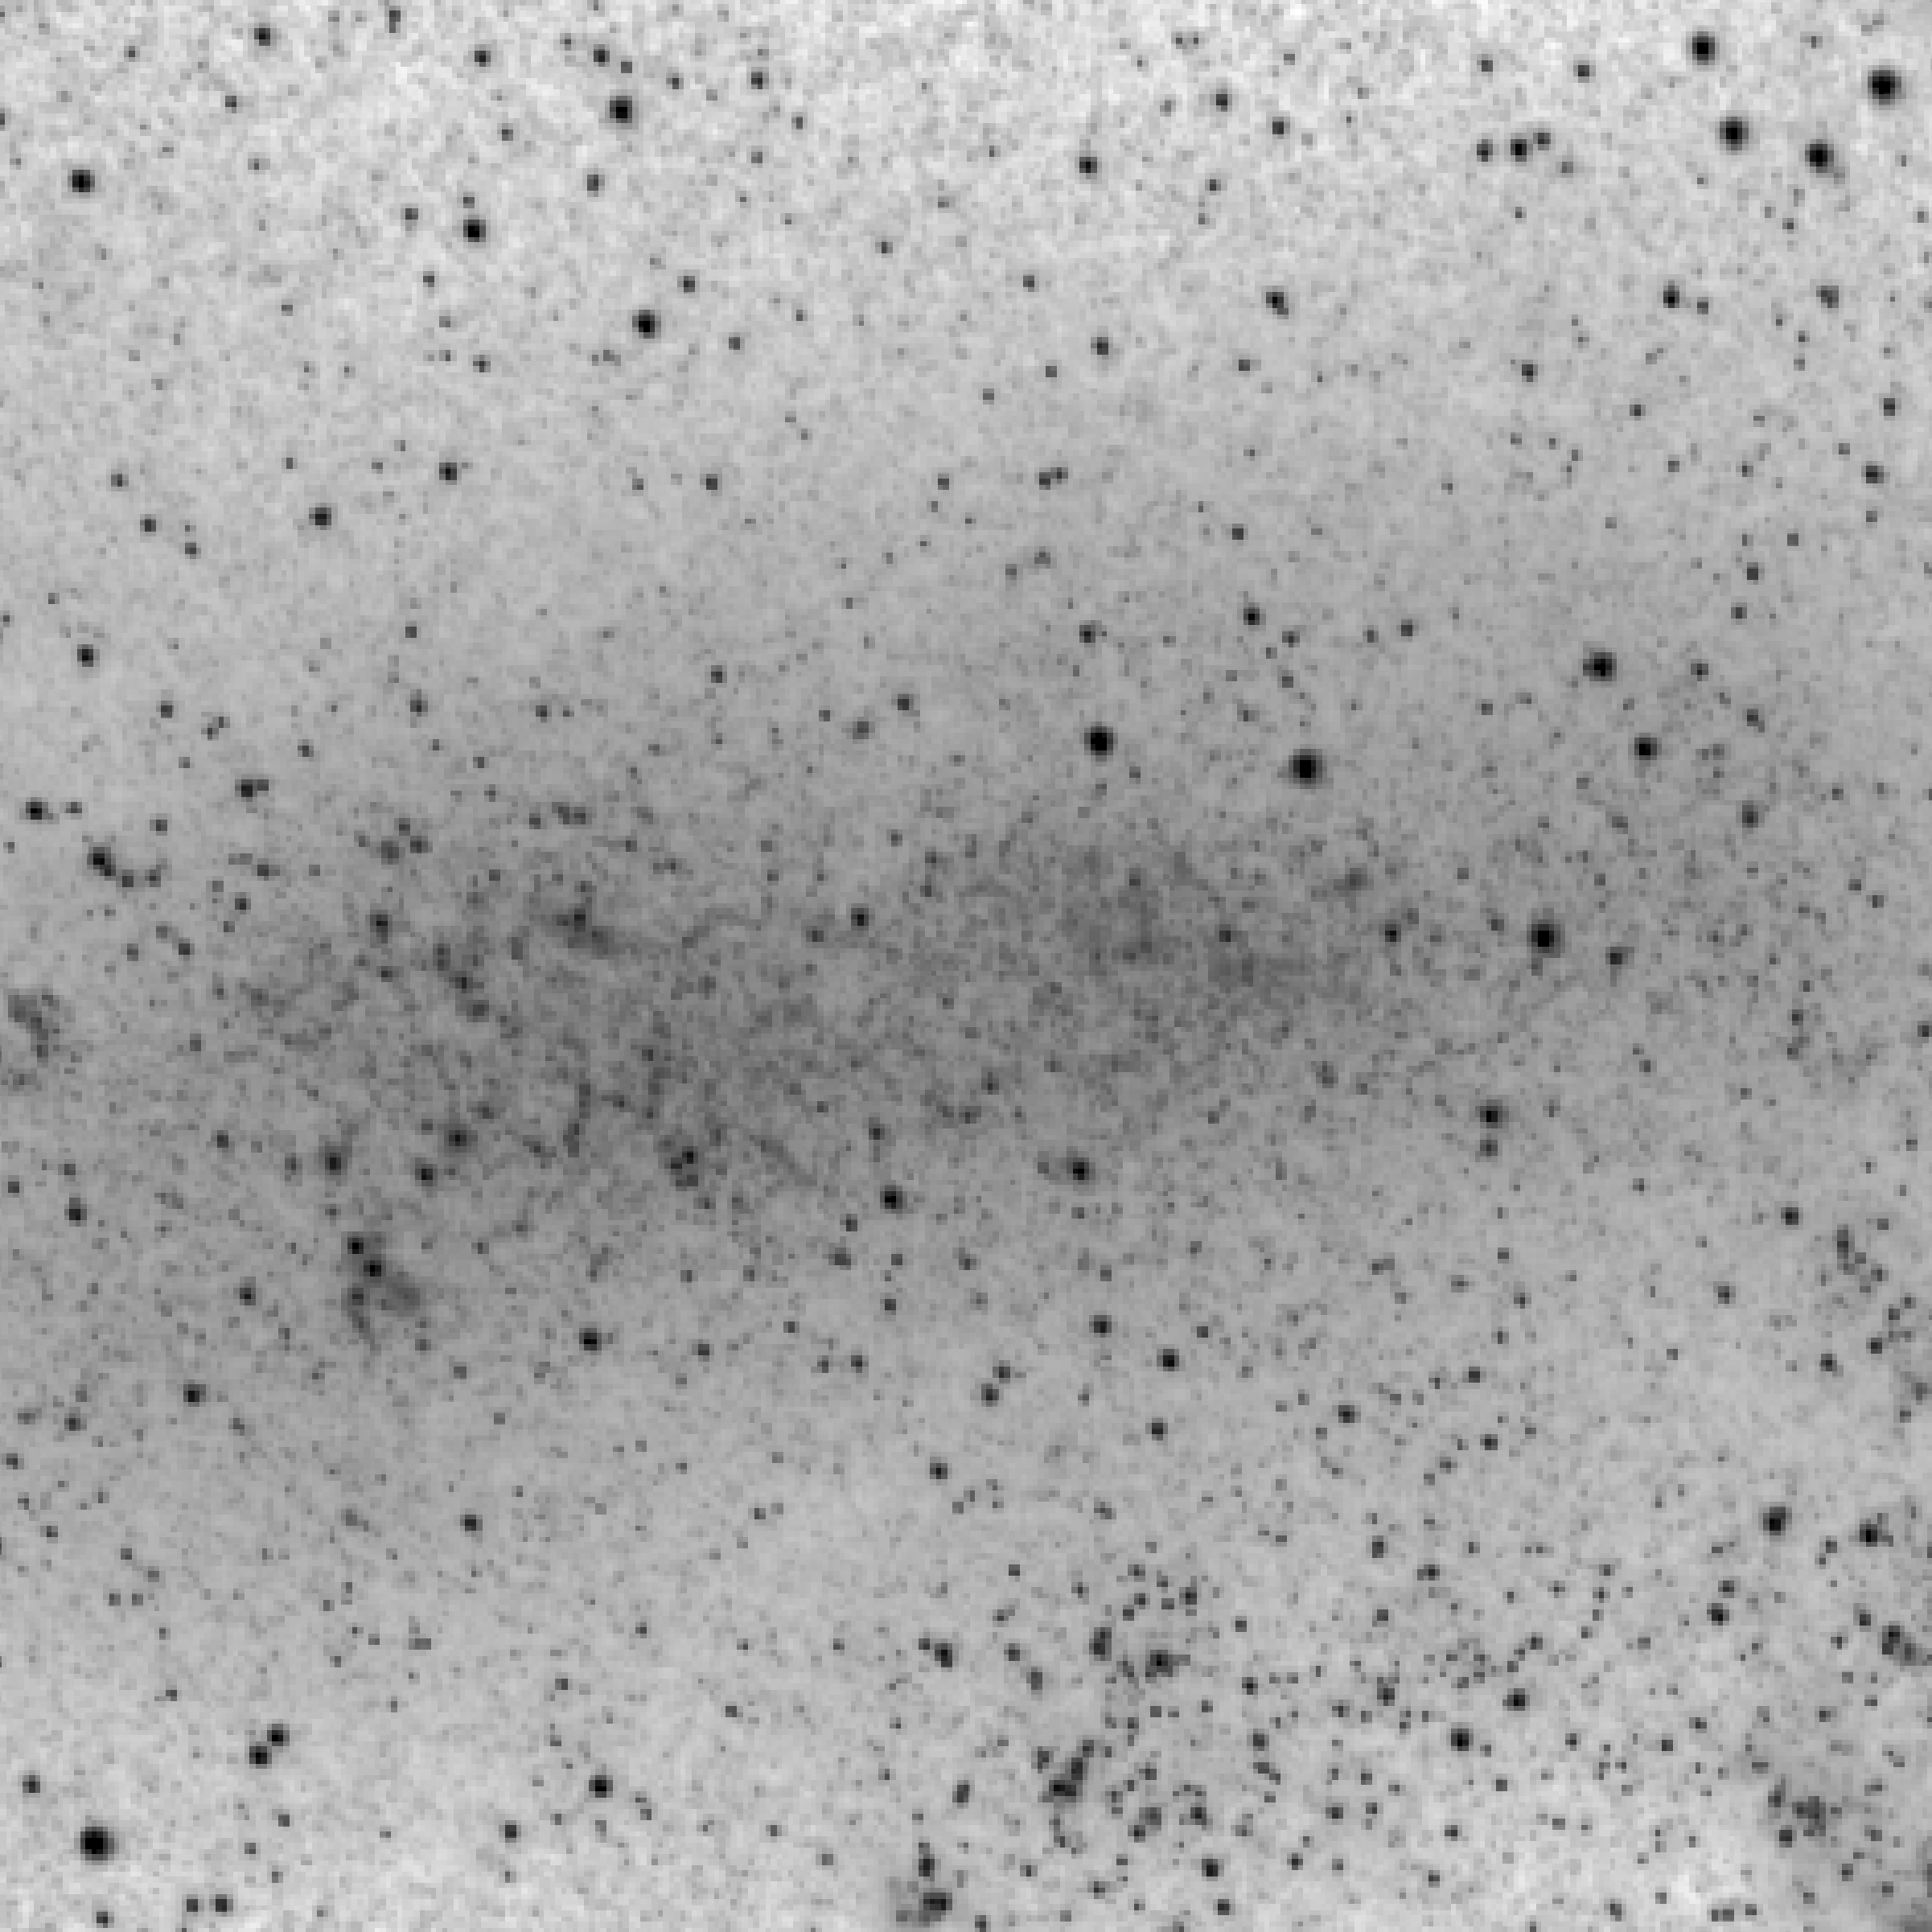

LMC_2.00000_tess_sector12_camera4_ccd1.fits


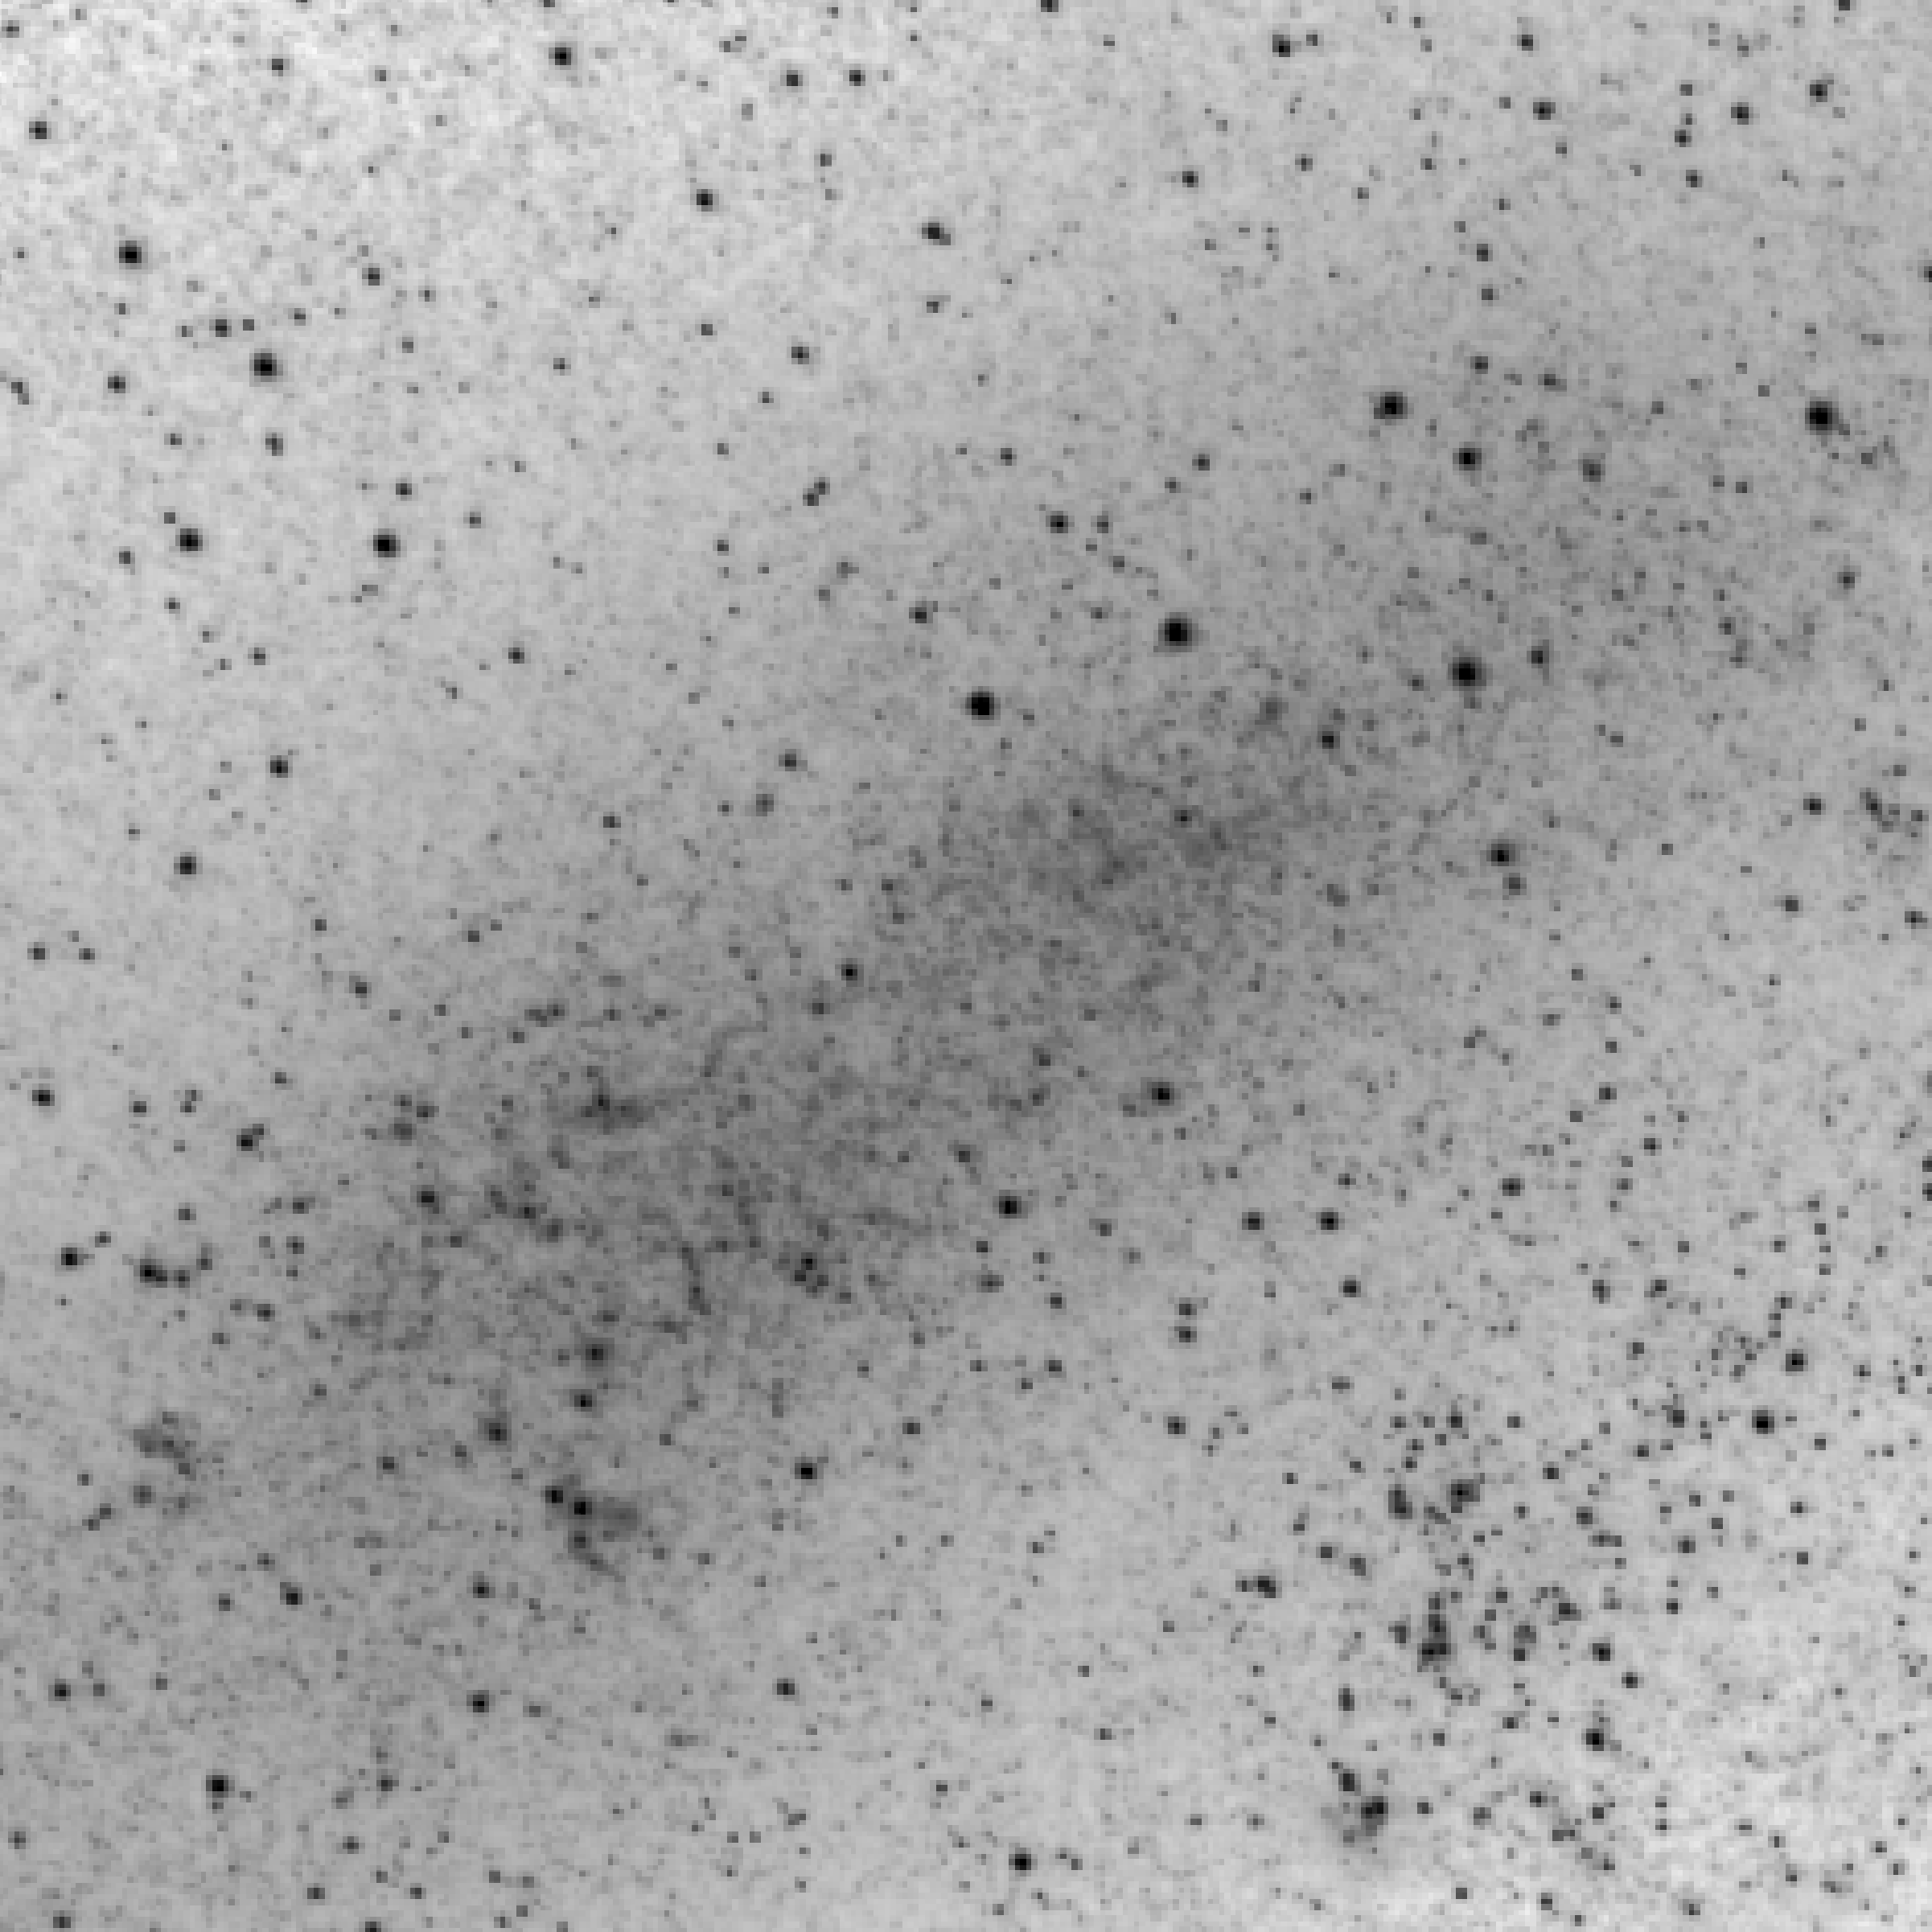

LMC_2.00000_tess_sector03_camera4_ccd2.fits


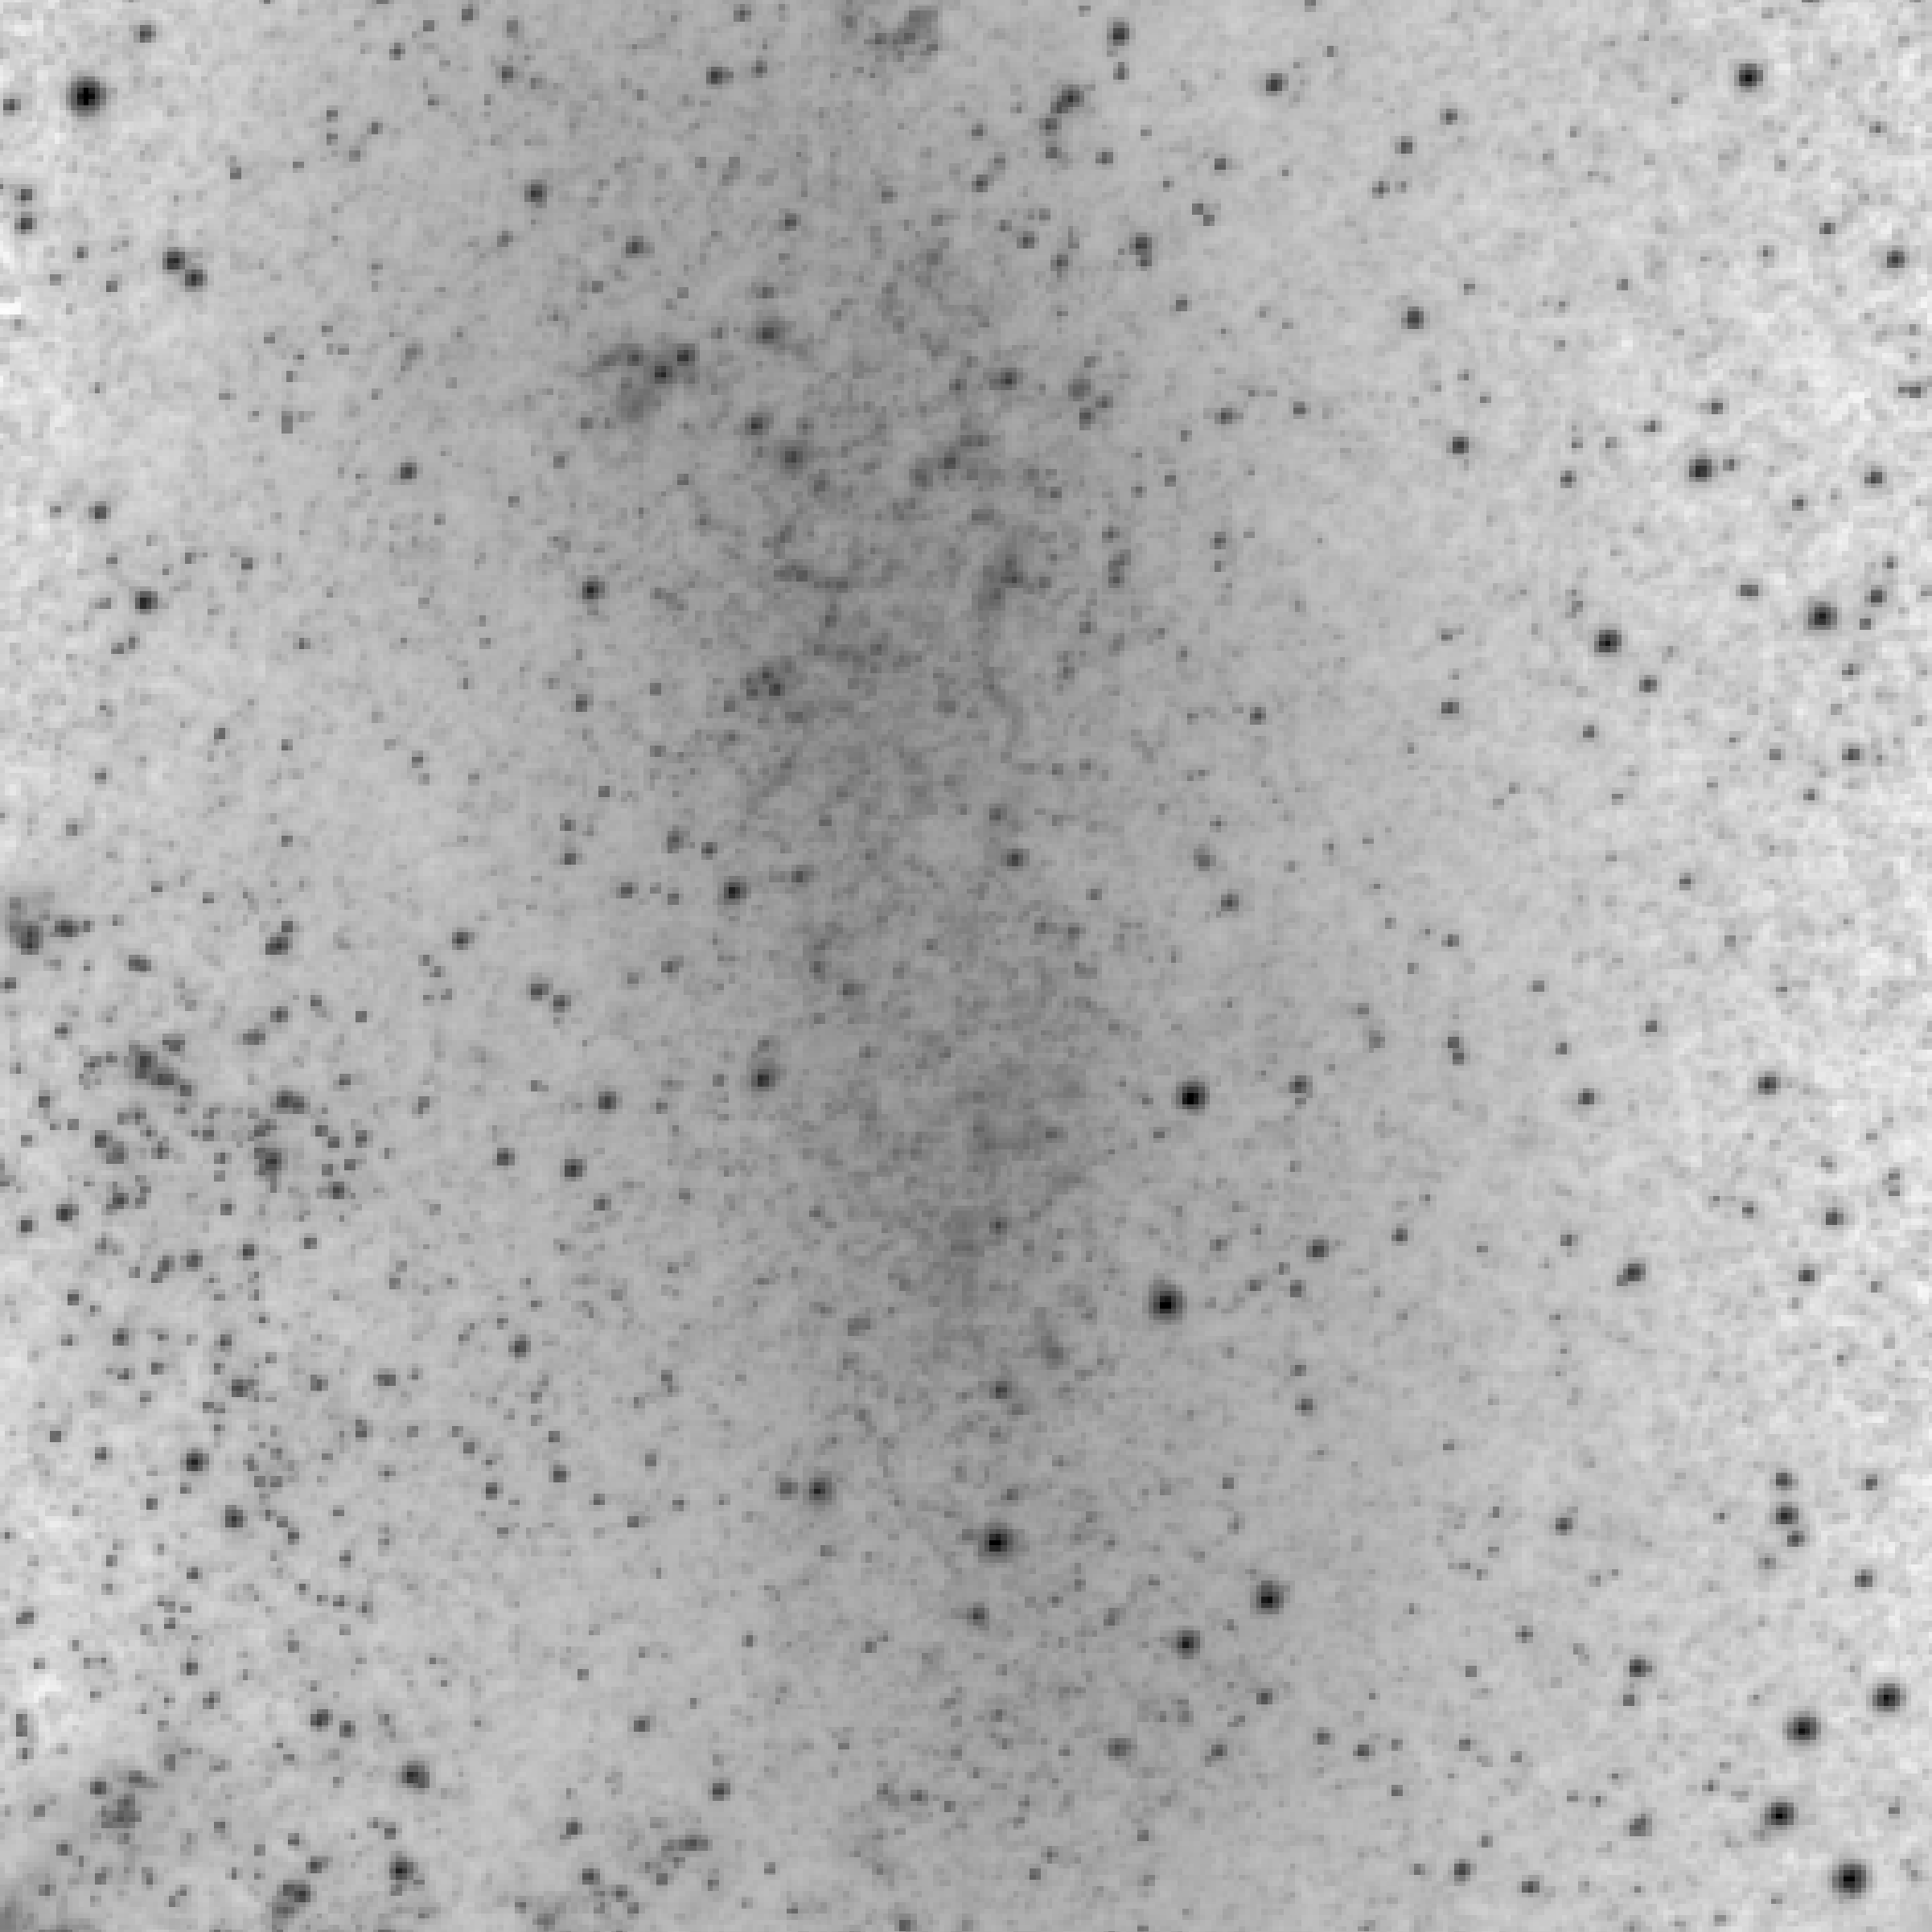

LMC_2.00000_tess_sector07_camera4_ccd3.fits


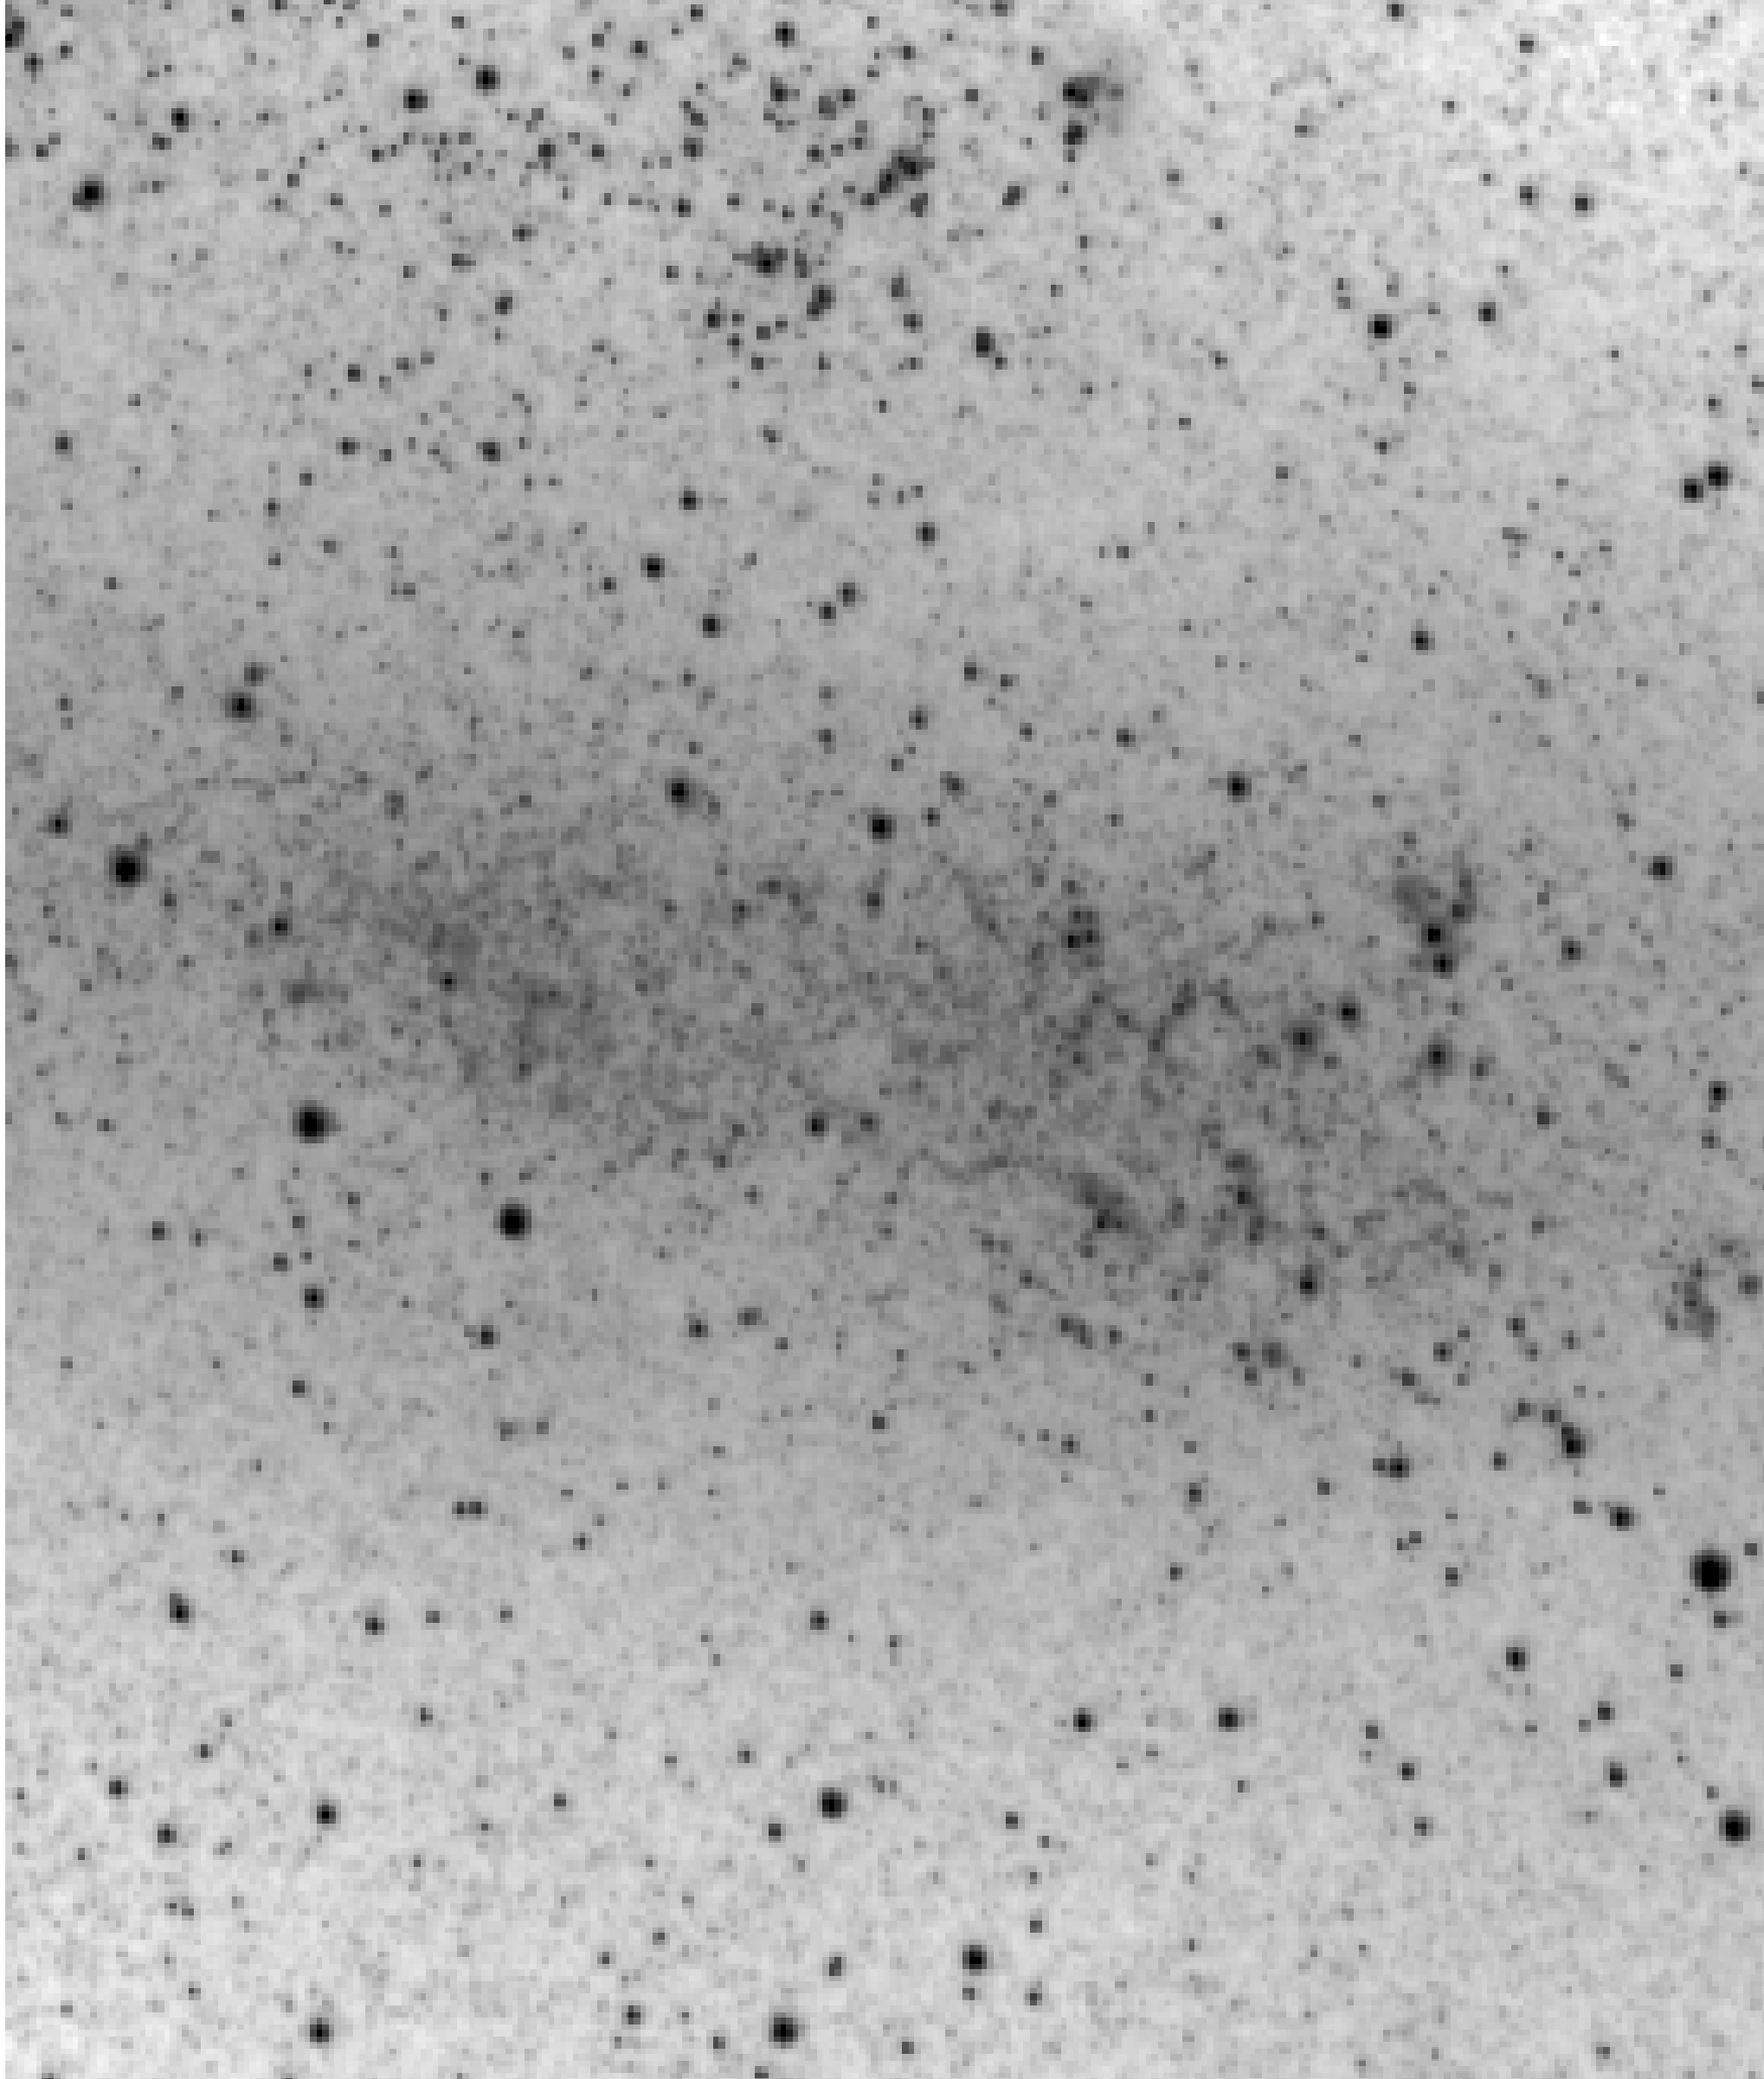

LMC_2.00000_tess_sector04_camera4_ccd2.fits


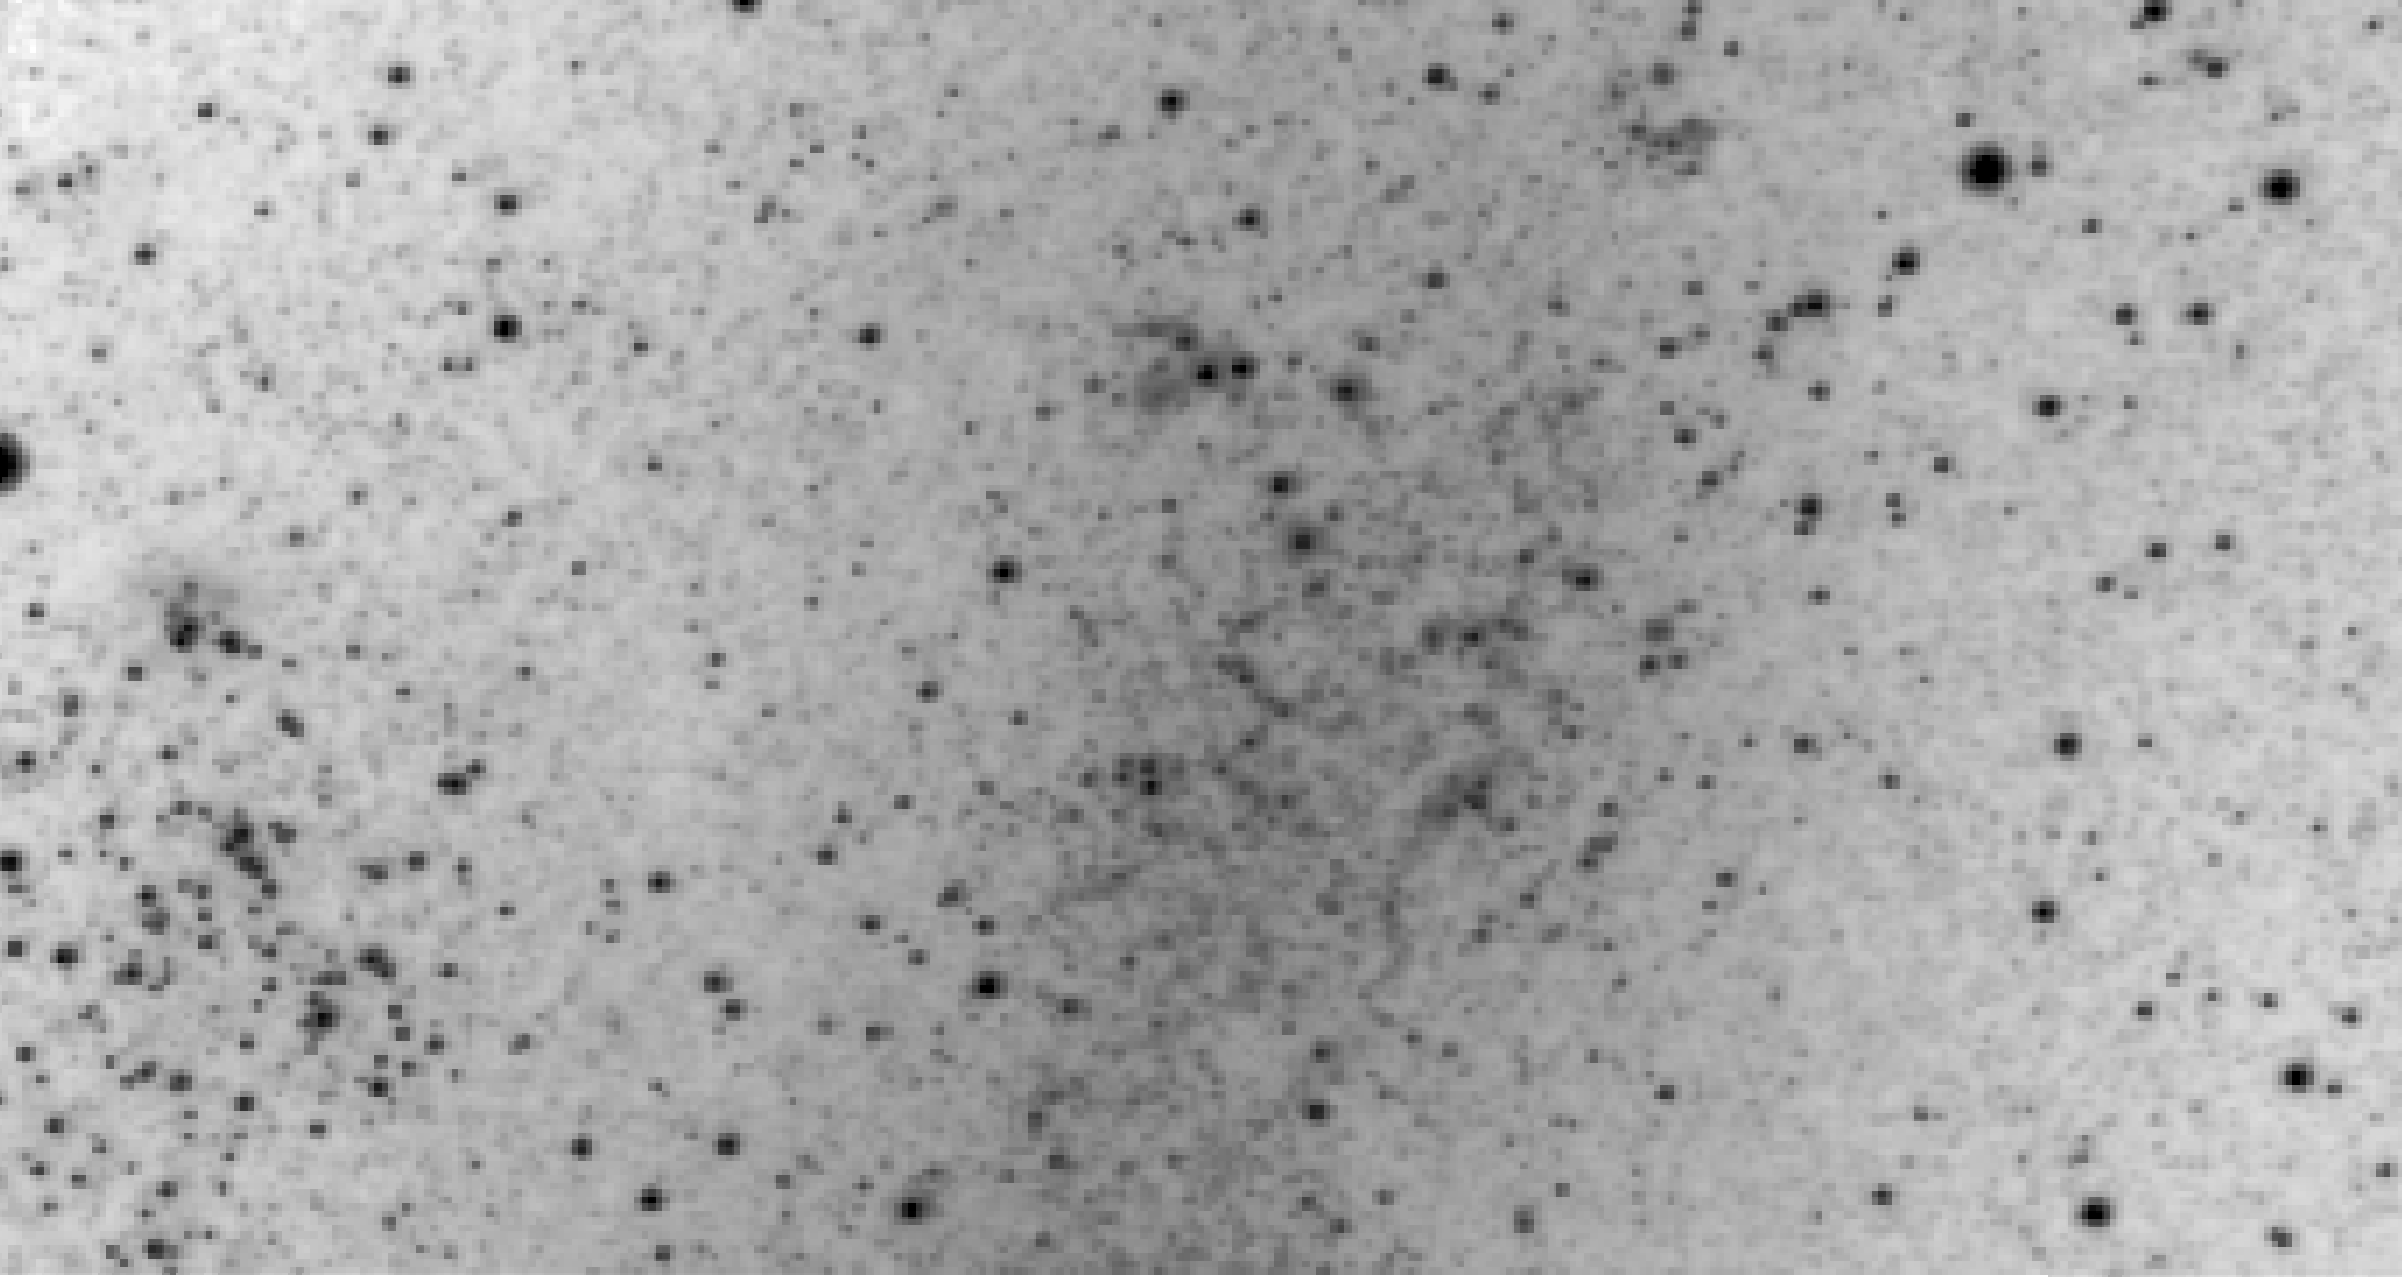

LMC_2.00000_tess_sector08_camera4_ccd4.fits


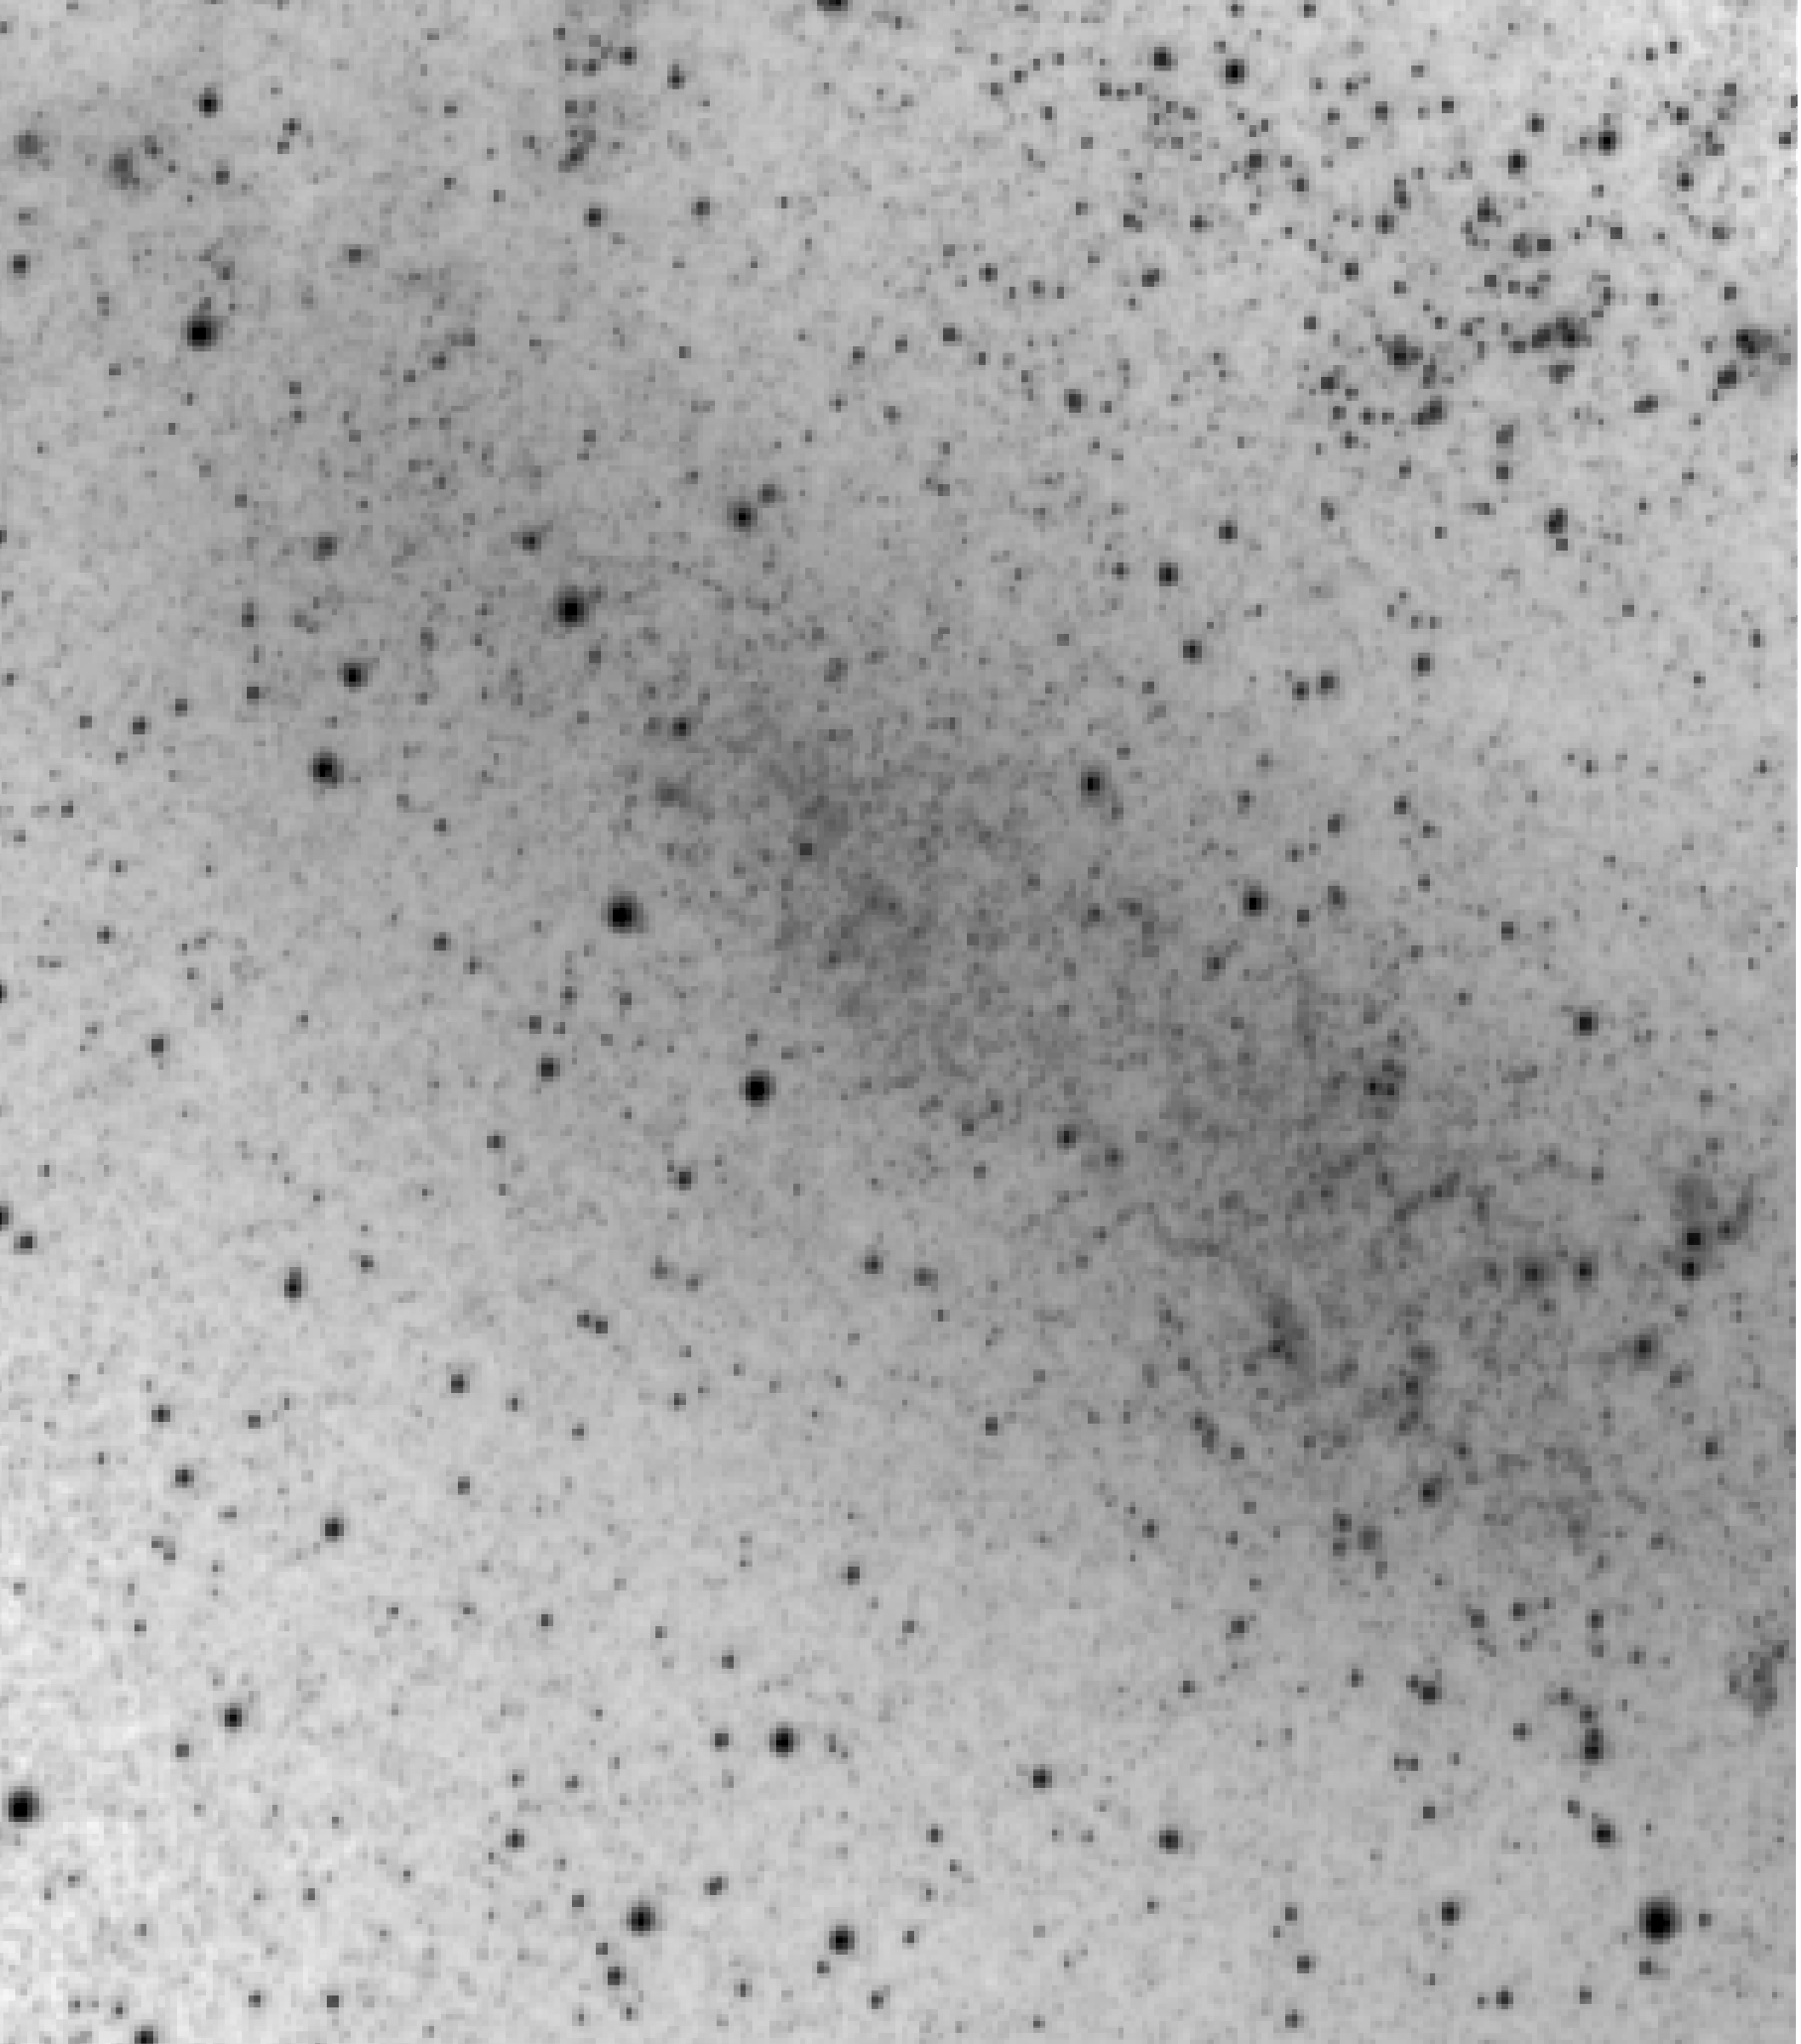

LMC_2.00000_tess_sector02_camera4_ccd2.fits


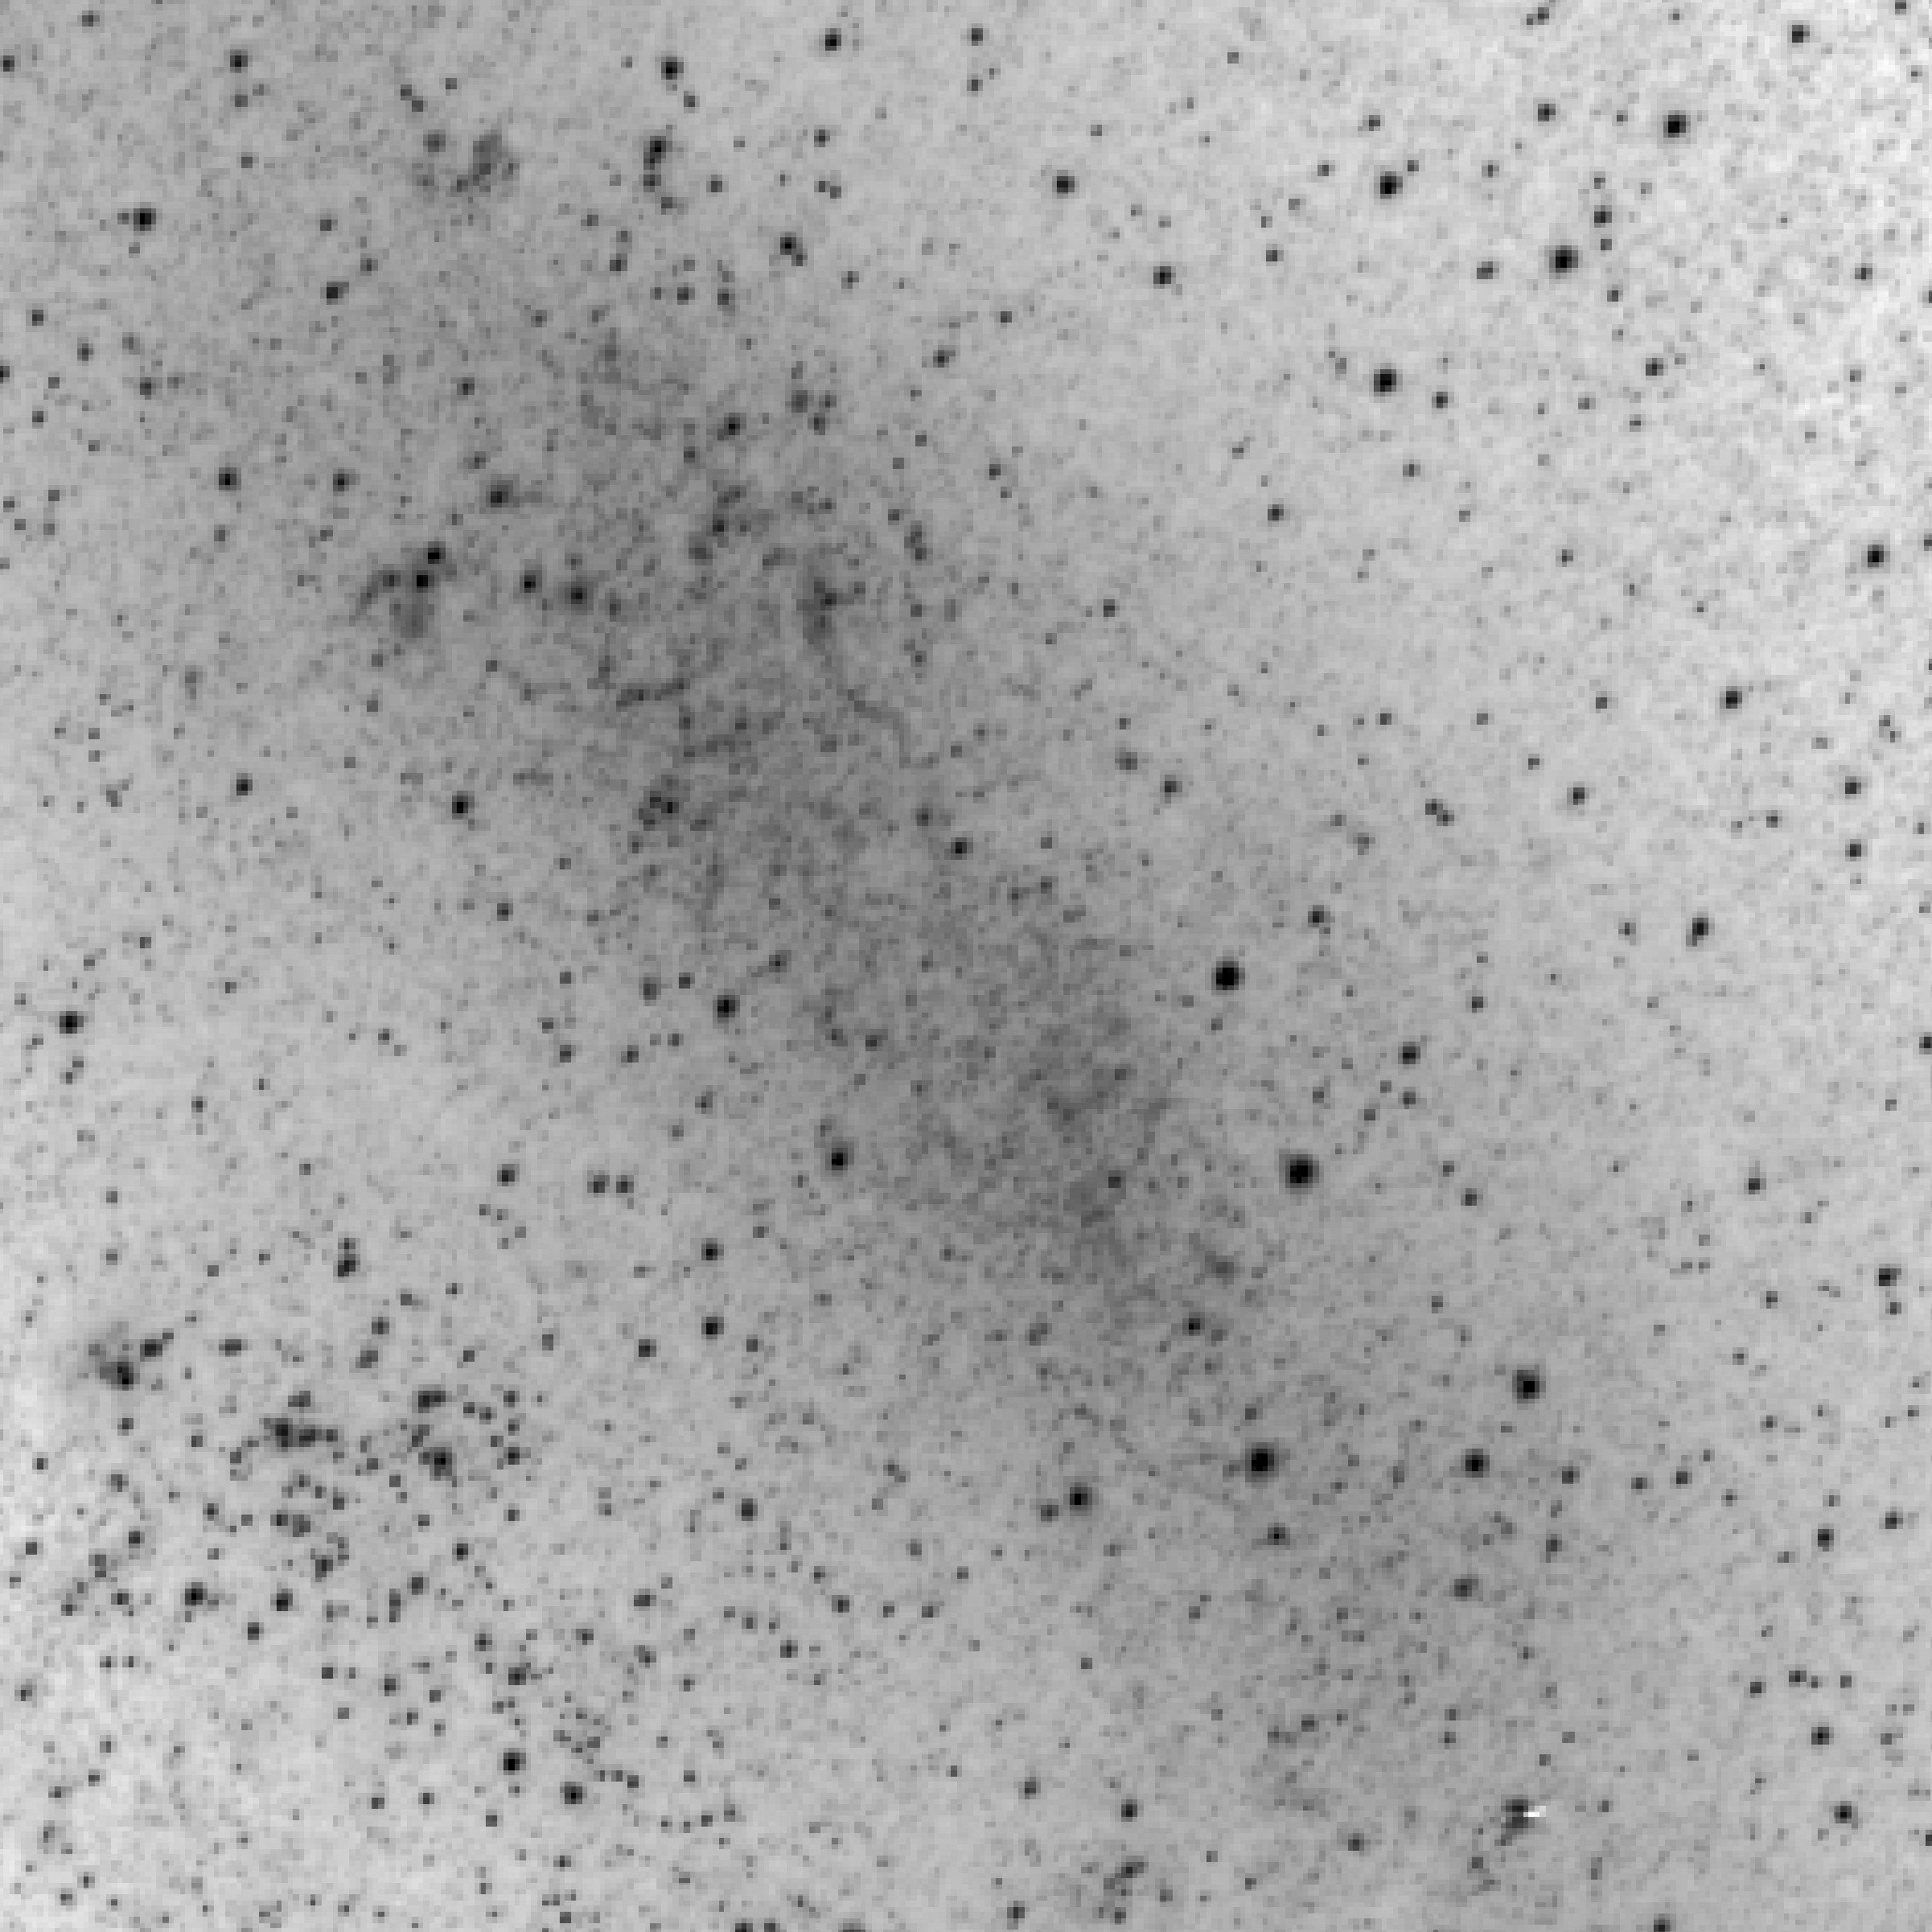

LMC_2.00000_tess_sector05_camera4_ccd3.fits


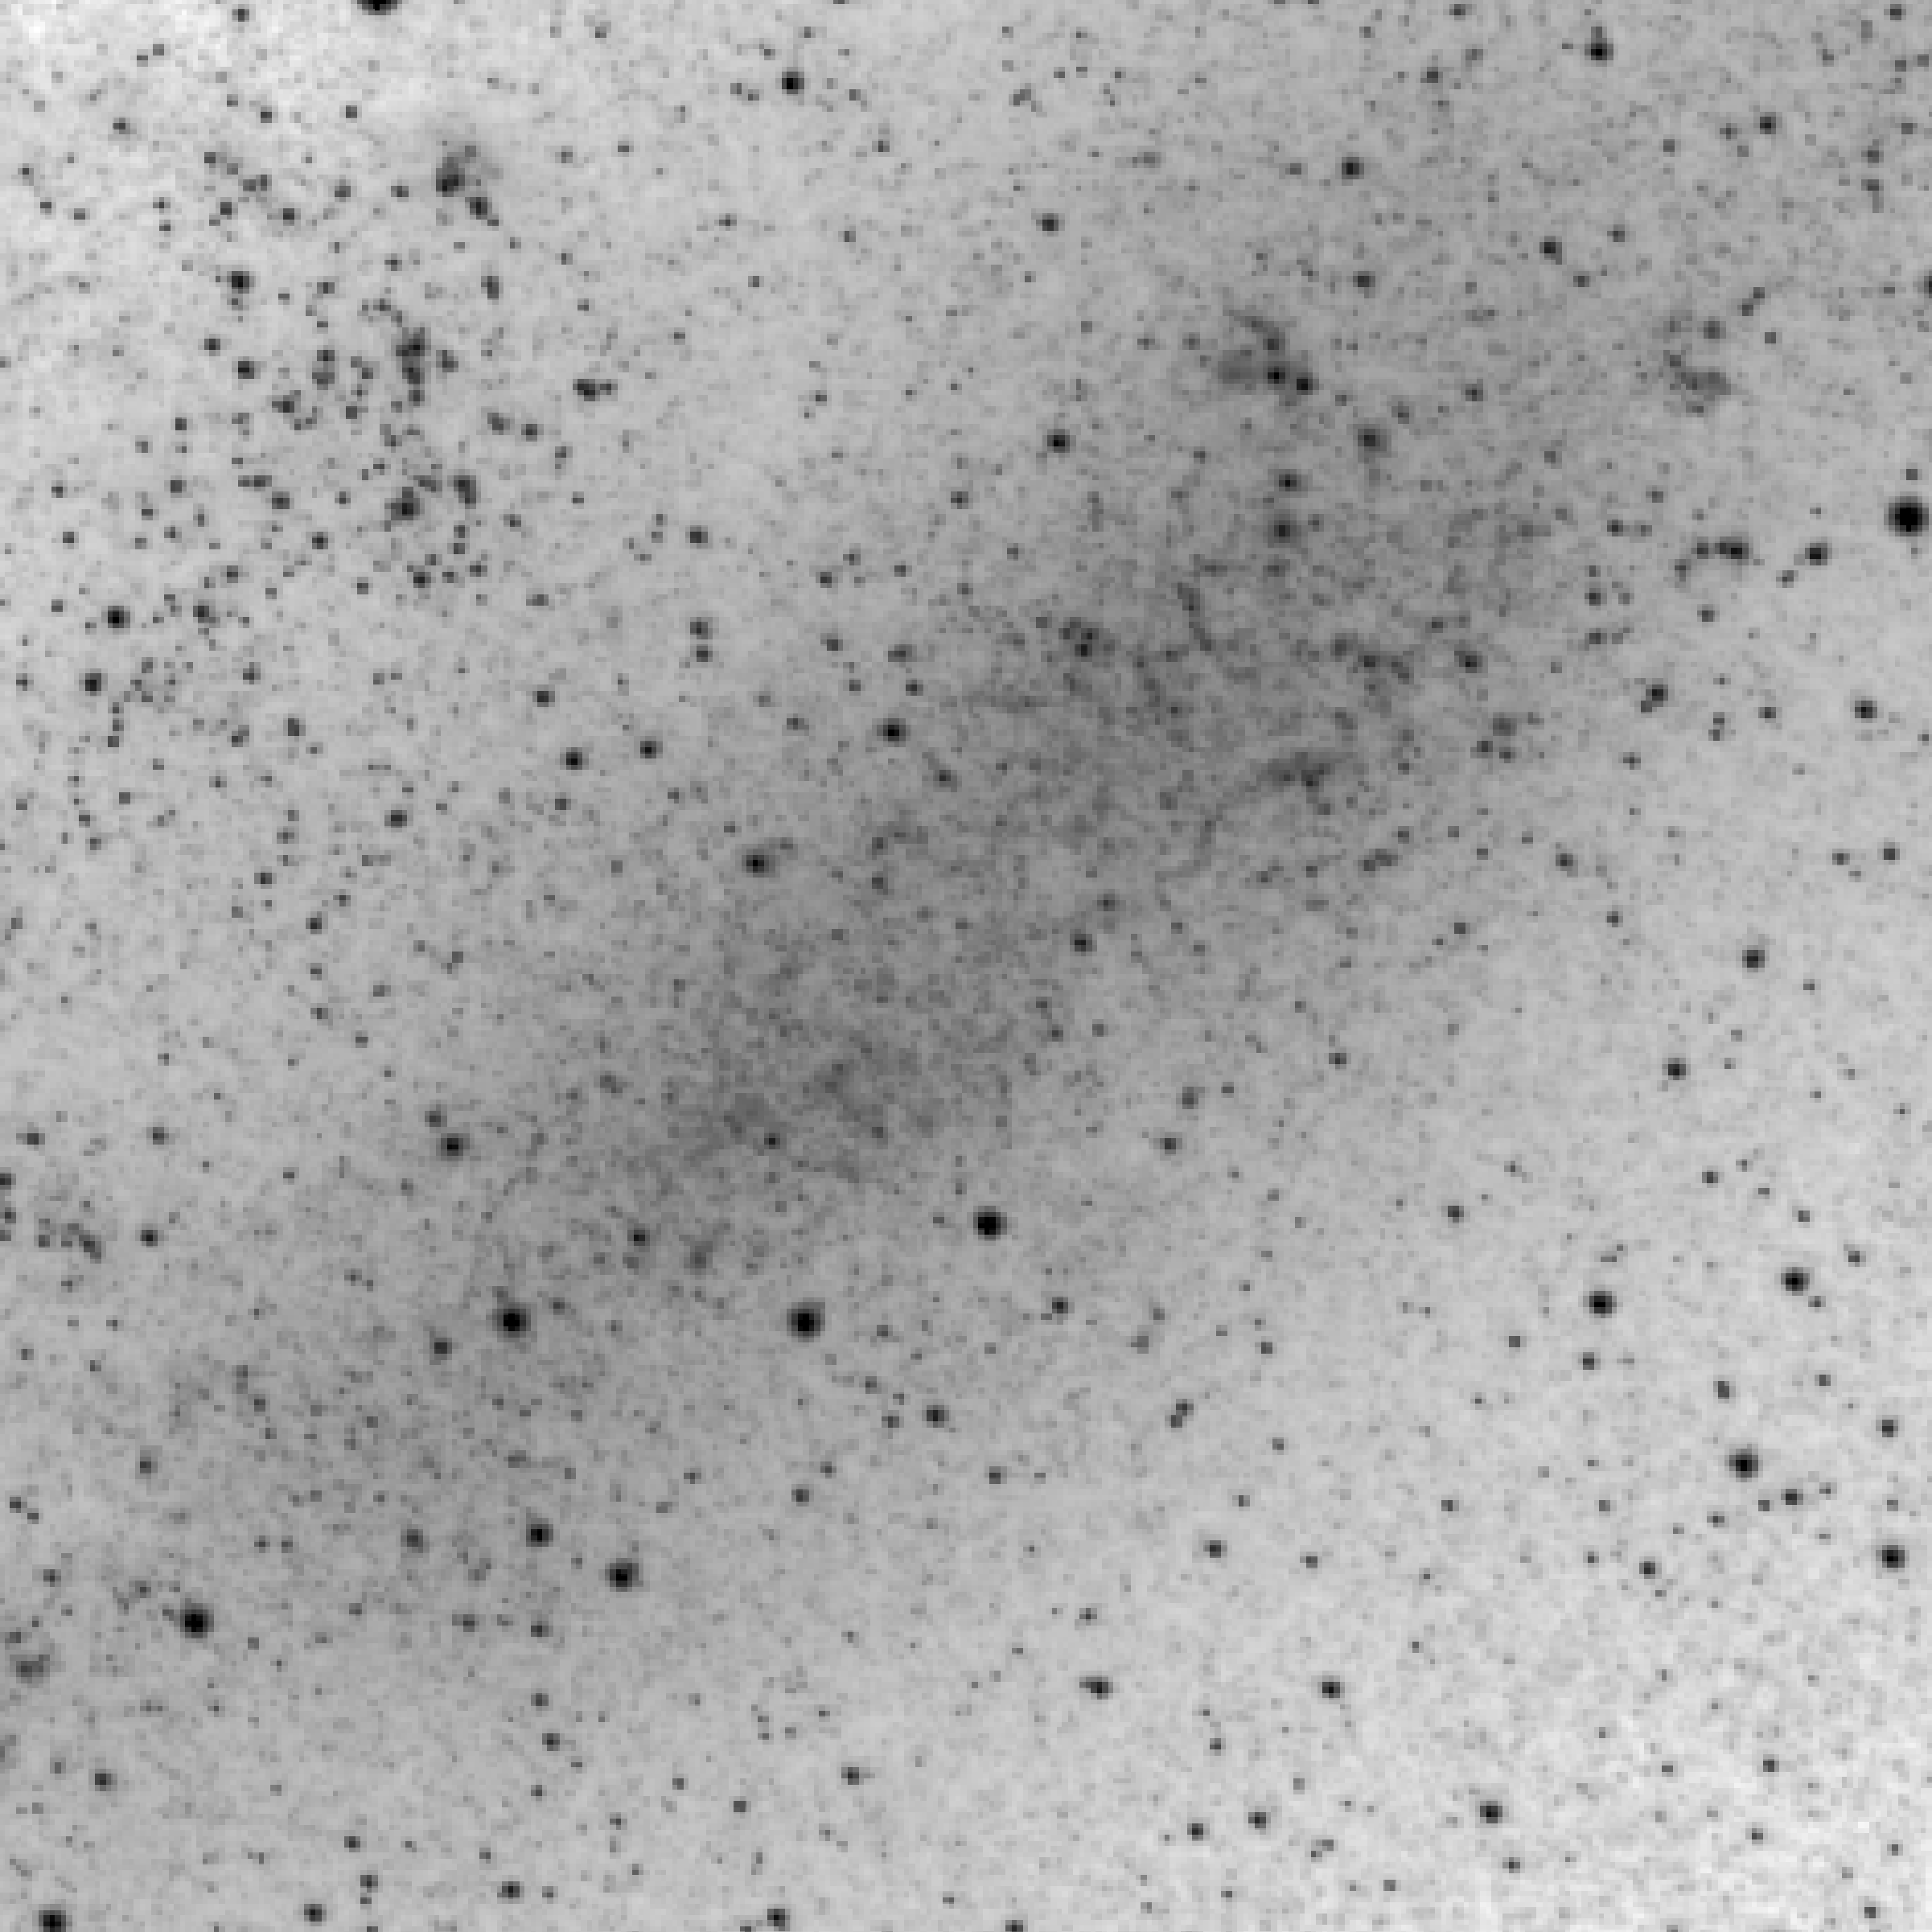

In [8]:
from MontagePy.main import mShrink, mViewer
from IPython.display import Image, display

for fname in filenames:
    print(fname)
    
    mShrink(fname, 'big.fits', 0.5)
    
    mViewer('-ct 1 -gray big.fits min max gaussian-log', 'tess.png', mode=2)

    image = Image(filename='tess.png')
    
    display(image)
    

<hr/>

## Download Montage at http://montage.ipac.caltech.edu or at       https://github.com/Caltech-IPAC/Montage




<hr/>

#### Acknowledgements
    
 <font color="#880000">    Montage is funded by the National Science Foundation under Grant Numbers ACI-1440620,1642453 and 1835379, and was previously funded by the National Aeronautics and Space Administration's Earth Science Technology Office, Computation Technologies Project, under Cooperative Agreement Number NCC5-626 between NASA and the California Institute of Technology. The coadded  images were created with Amazon Web Services, and underwritten by a generous award of research credits. The TESS images were obtained from the MAST data archive at the Space Telescope Science Institute (STScI). Funding for the TESS mission is provided by the NASA Explorer Program. STScI is operated by the Association of Universities for Research in Astronomy, Inc., under NASA contract NAS 5–26555.